In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 16.4MB/s 
     |████████████████████████████████| 14.8MB 228kB/s 


In [ ]:
!pip install folium

In [ ]:
!pip install haversine

In [ ]:
from shapely.geometry import Point, Polygon, LineString

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from haversine import haversine
import pickle
from tqdm.notebook import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 데이터 불러오기

In [ ]:
# 데이터
bike_oh=pd.read_csv('/content/drive/My Drive/compas/SBJ_2007_001/01.운영이력.csv')
Bike_Station=pd.read_csv('/content/drive/My Drive/compas/SBJ_2007_001/02.자전거스테이션.csv')
population=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/06.인구(거주)분포도(100M X 100M).geojson')
space_plan=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/10.도시계획(공간시설).geojson')
culphy_plan=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/11.도시계획(공공문화제육시설).geojson')
traffic_plan=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/12.도시계획(교통시설).geojson')
wetland_cons=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/13.용도지역지구(습지보호지역).geojson')
build_road=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/15.도로명주소_건물.geojson')
road_road=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/16.도로명주소_도로.geojson')
build_dist=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/17.일반건물 분포도(100M X 100M).geojson')
fes_space=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/18.행사장_공간정보.csv')
subway_station=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/19.전철역_공간정보.csv')
bus_station=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/20.고양시 버스정류소.csv')
parking_info=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/22.주차장정보.csv')
theat_muse=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/26.고양시 공연장 박물관 정보.csv')
physi_curr=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/27.고양시 체육시설 현황 정보.csv')
duk_godo=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/30.고양시_덕양구_고도.geojson')
ilsansu_godo=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/32.고양시_일산서구_고도.geojson')
ilsando_godo=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/31.고양시_일산동구_고도.geojson')
goyang_road=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/33.고양시_인도.geojson')

In [ ]:
# 라벨이 된 계획 데이터
space_label=pd.read_pickle('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/도시계획 활용 모델(기존과 계획 분리)/계획 라벨 데이터 csv/도시계획(공간시설)_label')
culphy_label=pd.read_pickle('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/도시계획 활용 모델(기존과 계획 분리)/계획 라벨 데이터 csv/도시계획(공공문화체육시설)_label')
traffic_label=pd.read_pickle('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/도시계획 활용 모델(기존과 계획 분리)/계획 라벨 데이터 csv/도시계획(교통시설)_label')

In [ ]:
Bike_Station

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530
...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231
161,352,◆꿈에그린203동앞,40,37.666425,126.749244
162,353,◆꿈에그린106동앞,40,37.666720,126.750784


In [ ]:
center = (37.647972, 126.835398)
zoom = 15
m = folium.Map(location = center, 
               zoom_start = zoom,
               tiles = 'http://api.vworld.kr/req/wmts/1.0.0/FEDE7284-9E9D-3624-BCA7-DDB9767882ED/Base/{z}/{y}/{x}.png',
               attr = '고양시'
              )
for index, row in Bike_Station.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)    
    folium.Circle([row['위도'], row['경도']],
                  radius = 300, color = 'red' ).add_to(m)
m

#Multipolygon
- geometry type이 Multipolygon인 데이터프레임에 대하여 LSCP 데이터프레임 생성

In [ ]:
import math

In [ ]:
# 300m 기준
lscp_distance=300

In [ ]:
def geo_dis(Bike_Station, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('dgm_nm')>=0) | 
                                     (t.lower().find('bdtyp_cd')>=0) | (t.lower().find('mnum')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for nm, geometry in zip(target[target_nm],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for polygon in geometry for point in polygon.exterior.coords[:]]
# Bike_Station 기준으로 해당 멀티폴리곤의 모든 점과의 거리를 구함
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
# 만약 그 거리가 LSCP 기준 보다 낮으면 반환.
      if min(h)<=lscp_distance:
        lscp.append([sta,nm,min(h)])
  return lscp

In [ ]:
population

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


In [ ]:
space_plan

,MNUM,ALIAS,REMARK,geometry
0,39400004128020200102UQT3300001000,None,None,"MULTIPOLYGON (((126.79244 37.67061, 126.79245 ..."
1,39400004128020200102UQT3300002000,None,None,"MULTIPOLYGON (((126.79125 37.66747, 126.79126 ..."
2,39400004128020200102UQT2100001000,None,None,"MULTIPOLYGON (((126.79216 37.67002, 126.79221 ..."
3,39400004128020200102UQT3100001000,None,None,"MULTIPOLYGON (((126.79275 37.66799, 126.79301 ..."
4,39400004128020200102UQT3100002000,None,None,"MULTIPOLYGON (((126.79139 37.66740, 126.79154 ..."
...,...,...,...,...
1089,16130004128020130925UQT3200087000,None,None,"MULTIPOLYGON (((126.87392 37.64883, 126.87388 ..."
1090,16130004128020150203UQT2200005000,None,None,"MULTIPOLYGON (((126.88345 37.66780, 126.88346 ..."
1091,16130004128020150203UQT2200003000,None,None,"MULTIPOLYGON (((126.88881 37.64833, 126.88854 ..."
1092,16130004128020150203UQT2200002000,None,None,"MULTIPOLYGON (((126.88267 37.64497, 126.88218 ..."


In [ ]:
culphy_plan

,DGM_NM,DGM_AR,DGM_LT,geometry
0,기타 사회복지시설,2627,211,"MULTIPOLYGON (((126.86736 37.62940, 126.86761 ..."
1,초등학교,13070,461,"MULTIPOLYGON (((126.90542 37.71515, 126.90619 ..."
2,기타 사회복지시설,560,95,"MULTIPOLYGON (((126.78826 37.67892, 126.78836 ..."
3,초등학교,12000,444,"MULTIPOLYGON (((126.81611 37.68054, 126.81659 ..."
4,유치원,3000,219,"MULTIPOLYGON (((126.81012 37.68488, 126.81062 ..."
...,...,...,...,...
403,초등학교,6313,361,"MULTIPOLYGON (((126.78123 37.68526, 126.78126 ..."
404,골프장,295598,3041,"MULTIPOLYGON (((126.85537 37.63687, 126.85545 ..."
405,기타 사회복지시설,1063,137,"MULTIPOLYGON (((126.82721 37.70204, 126.82740 ..."
406,기타 사회복지시설,935,150,"MULTIPOLYGON (((126.90365 37.70301, 126.90365 ..."


In [ ]:
traffic_plan

,DGM_NM,DGM_AR,DGM_LT,geometry
0,노외주차장,1930,269,"MULTIPOLYGON (((126.89527 37.70315, 126.89514 ..."
1,노외주차장,1006,130,"MULTIPOLYGON (((126.79379 37.65890, 126.79391 ..."
2,노외주차장,1111,134,"MULTIPOLYGON (((126.91072 37.71903, 126.91076 ..."
3,노외주차장,631,104,"MULTIPOLYGON (((126.89455 37.62056, 126.89480 ..."
4,노외주차장,987,132,"MULTIPOLYGON (((126.87241 37.59324, 126.87251 ..."
...,...,...,...,...
318,노외주차장,2057,188,"MULTIPOLYGON (((126.80513 37.62288, 126.80527 ..."
319,노외주차장,420,93,"MULTIPOLYGON (((126.85073 37.64267, 126.85075 ..."
320,노외주차장,982,150,"MULTIPOLYGON (((126.86762 37.61254, 126.86787 ..."
321,노외주차장,621,106,"MULTIPOLYGON (((126.81503 37.60231, 126.81503 ..."


In [ ]:
# 라벨 1.0이 실제하는 데이터, 라벨 5.0이 계획만 존재하는 데이터
space_label

,MNUM,ALIAS,REMARK,geometry,X,Y,분류,UQT_m,라벨
0,39400004128020200102UQT3300001000,None,None,"MULTIPOLYGON (((126.79244 37.67061, 126.79245 ...",126.7936099875808,37.67333967826329,도시계획(공간시설),UQT330,1.0
1,39400004128020200102UQT3300002000,None,None,"MULTIPOLYGON (((126.79125 37.66747, 126.79126 ...",126.7918734424817,37.66874345455179,도시계획(공간시설),UQT330,5.0
2,39400004128020200102UQT2100001000,None,None,"MULTIPOLYGON (((126.79216 37.67002, 126.79221 ...",126.7927151529762,37.67029253893141,도시계획(공간시설),UQT210,5.0
3,39400004128020200102UQT3100001000,None,None,"MULTIPOLYGON (((126.79275 37.66799, 126.79301 ...",126.7933942047138,37.66893969126546,도시계획(공간시설),UQT310,5.0
4,39400004128020200102UQT3100002000,None,None,"MULTIPOLYGON (((126.79139 37.66740, 126.79154 ...",126.7917703990605,37.66750877255492,도시계획(공간시설),UQT310,5.0
...,...,...,...,...,...,...,...,...,...
1089,16130004128020130925UQT3200087000,None,None,"MULTIPOLYGON (((126.87392 37.64883, 126.87388 ...",126.8735584432168,37.64892193975117,도시계획(공간시설),UQT320,5.0
1090,16130004128020150203UQT2200005000,None,None,"MULTIPOLYGON (((126.88345 37.66780, 126.88346 ...",126.8814772846331,37.66689387114834,도시계획(공간시설),UQT220,5.0
1091,16130004128020150203UQT2200003000,None,None,"MULTIPOLYGON (((126.88881 37.64833, 126.88854 ...",126.8866241237189,37.64934642927916,도시계획(공간시설),UQT220,1.0
1092,16130004128020150203UQT2200002000,None,None,"MULTIPOLYGON (((126.88267 37.64497, 126.88218 ...",126.8803305539819,37.64407697539723,도시계획(공간시설),UQT220,1.0


In [ ]:
# 라벨 1.0이 실제하는 데이터, 라벨 5.0이 계획만 존재하는 데이터
culphy_label

,DGM_NM,DGM_AR,DGM_LT,geometry,X,Y,분류,라벨
0,기타 사회복지시설,2627,211,"MULTIPOLYGON (((126.86736 37.62940, 126.86761 ...",126.8678035135257,37.62941609459419,도시계획(공공문화체육시설),5.0
1,초등학교,13070,461,"MULTIPOLYGON (((126.90542 37.71515, 126.90619 ...",126.9062467951463,37.71512129388354,도시계획(공공문화체육시설),5.0
2,기타 사회복지시설,560,95,"MULTIPOLYGON (((126.78826 37.67892, 126.78836 ...",126.788205704093,37.67878561342879,도시계획(공공문화체육시설),1.0
3,초등학교,12000,444,"MULTIPOLYGON (((126.81611 37.68054, 126.81659 ...",126.8169627691664,37.68077824880825,도시계획(공공문화체육시설),5.0
4,유치원,3000,219,"MULTIPOLYGON (((126.81012 37.68488, 126.81062 ...",126.8105259693208,37.6847532762954,도시계획(공공문화체육시설),5.0
...,...,...,...,...,...,...,...,...
403,초등학교,6313,361,"MULTIPOLYGON (((126.78123 37.68526, 126.78126 ...",126.7816456342438,37.68489681428844,도시계획(공공문화체육시설),1.0
404,골프장,295598,3041,"MULTIPOLYGON (((126.85537 37.63687, 126.85545 ...",126.8584076302691,37.63594634957705,도시계획(공공문화체육시설),1.0
405,기타 사회복지시설,1063,137,"MULTIPOLYGON (((126.82721 37.70204, 126.82740 ...",126.8271365097641,37.70187565255021,도시계획(공공문화체육시설),1.0
406,기타 사회복지시설,935,150,"MULTIPOLYGON (((126.90365 37.70301, 126.90365 ...",126.9037482922718,37.70334943969106,도시계획(공공문화체육시설),1.0


In [ ]:
# 라벨 1.0이 실제하는 데이터, 라벨 5.0이 계획만 존재하는 데이터
traffic_label

,DGM_NM,DGM_AR,DGM_LT,geometry,X,Y,분류,라벨
0,노외주차장,1930,269,"MULTIPOLYGON (((126.89527 37.70315, 126.89514 ...",126.8954978421802,37.70329162391477,도시계획(교통시설),5.0
1,노외주차장,1006,130,"MULTIPOLYGON (((126.79379 37.65890, 126.79391 ...",126.7936448658783,37.65872228216595,도시계획(교통시설),5.0
2,노외주차장,1111,134,"MULTIPOLYGON (((126.91072 37.71903, 126.91076 ...",126.9109444273574,37.71915380939122,도시계획(교통시설),5.0
3,노외주차장,631,104,"MULTIPOLYGON (((126.89455 37.62056, 126.89480 ...",126.8945860462858,37.62042561449137,도시계획(교통시설),5.0
4,노외주차장,987,132,"MULTIPOLYGON (((126.87241 37.59324, 126.87251 ...",126.8723205242999,37.59312860567663,도시계획(교통시설),5.0
...,...,...,...,...,...,...,...,...
318,노외주차장,2057,188,"MULTIPOLYGON (((126.80513 37.62288, 126.80527 ...",126.8050366071987,37.62267313718874,도시계획(교통시설),5.0
319,노외주차장,420,93,"MULTIPOLYGON (((126.85073 37.64267, 126.85075 ...",126.8505723936058,37.64269599696729,도시계획(교통시설),5.0
320,노외주차장,982,150,"MULTIPOLYGON (((126.86762 37.61254, 126.86787 ...",126.867826953065,37.61275405466562,도시계획(교통시설),5.0
321,노외주차장,621,106,"MULTIPOLYGON (((126.81503 37.60231, 126.81503 ...",126.8149524001323,37.6022239615025,도시계획(교통시설),1.0


In [ ]:
build_road

,BDTYP_CD,BULD_NM,BULD_NM_DC,EMD_CD,GRO_FLO_CO,SIG_CD,UND_FLO_CO,geometry
0,01003,None,None,105,4,41281,0,"MULTIPOLYGON (((126.87256 37.62531, 126.87259 ..."
1,02003,헤리티지,3단지,113,4,41285,1,"MULTIPOLYGON (((126.77481 37.70779, 126.77485 ..."
2,02003,헤리티지,2단지,113,4,41285,1,"MULTIPOLYGON (((126.77510 37.70767, 126.77515 ..."
3,03999,None,None,111,3,41281,0,"MULTIPOLYGON (((126.89398 37.65698, 126.89411 ..."
4,03005,None,None,103,5,41281,0,"MULTIPOLYGON (((126.89124 37.66385, 126.89140 ..."
...,...,...,...,...,...,...,...,...
79997,03012,None,None,132,1,41281,0,"MULTIPOLYGON (((126.88868 37.59669, 126.88878 ..."
79998,21999,None,None,132,1,41281,0,"MULTIPOLYGON (((126.88879 37.59669, 126.88889 ..."
79999,03001,None,None,115,1,41281,0,"MULTIPOLYGON (((126.90831 37.69544, 126.90847 ..."
80000,01003,None,None,132,4,41281,0,"MULTIPOLYGON (((126.89266 37.60498, 126.89280 ..."


In [ ]:
build_road['BDTYP_CD'].unique()

array(['01003', '02003', '03999', '03005', '01001', '13100', '16006',
       '03001', '17007', '16010', '04001', '03104', '14999', '04005',
       '04010', '04004', '14001', '04999', '19003', '04006', '02002',
       '01002', '04402', '04403', '08102', '17999', '10202', '17101',
       '17203', '03020', '19007', '04299', '08201', '16001', '06999',
       '03021', '04199', '05107', '08003', '08101', '15001', '06203',
       '08300', '02001', '04499', '17299', '05999', '07107', '16002',
       '03199', '04102', '03007', '03002', '18003', '05101', '05199',
       '19005', '08999', '15005', '01004', '04002', '18002', '16005',
       '90001', '05599', '06301', '03012', '08203', '04018', '04007',
       '09999', '02007', '11102', '17204', '08004', '04014', '11201',
       '05499', '08005', '15002', '04201', '07999', '09004', '17004',
       '17005', '08800', '04012', '03107', '02004', '02006', '02005',
       '03015', '04401', '10102', '03008', '08400', '10299', '16009',
       '10204', '169

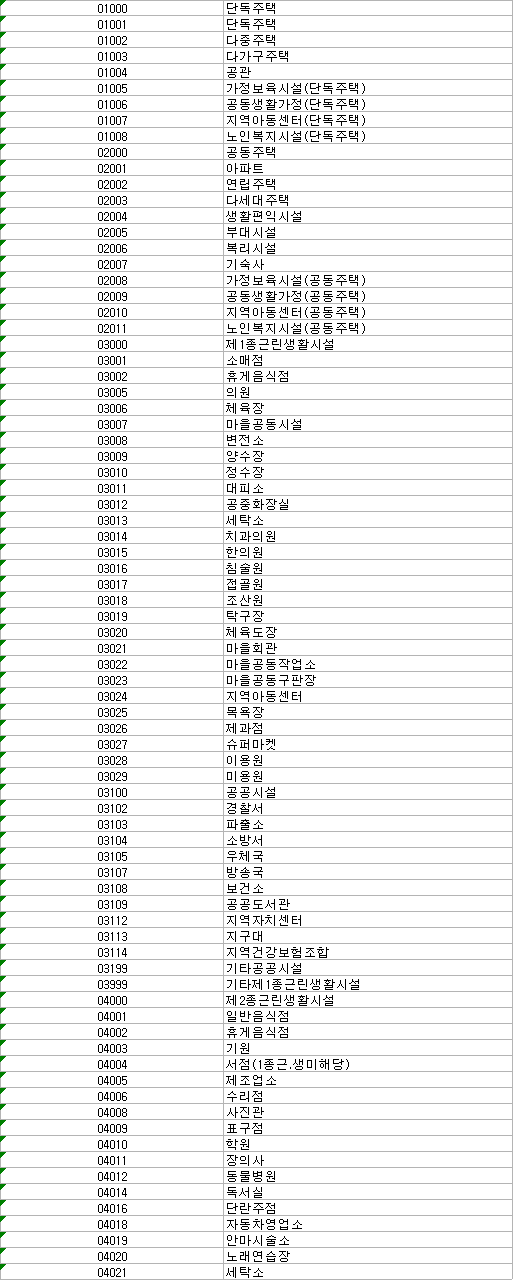

In [ ]:
build_dist

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


## population

In [ ]:
population = population.fillna(0)
population.head()

,gid,val,geometry
0,다사268650,0.0,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,0.0,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,0.0,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,0.0,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,0.0,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."


In [ ]:
#자전거 스테이션으로부터 lscp 이내 얼마나 많은 인구가 살고 있는지 계산해주는 함수
from haversine import haversine           
def geo_pop(Bike_Station, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.lower().find('gid')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for nm, geometry in zip(target[target_nm],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for polygon in geometry for point in polygon.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=lscp_distance:
        lscp.append([sta,nm,min(h)])
  return lscp

In [ ]:
geo_population=pd.DataFrame(geo_pop(Bike_Station,population),columns= ['Bike_Station', 'gid', 'haversine'])

In [ ]:
geo_population

,Bike_Station,gid,haversine
0,101,다사410616,290.680039
1,101,다사410617,230.607146
2,101,다사410618,204.823776
3,101,다사410619,204.823776
4,101,다사410620,225.420156
...,...,...,...
6738,992,다사414601,210.203029
6739,992,다사414602,275.183991
6740,992,다사415598,295.655530
6741,992,다사415599,280.673073


In [ ]:
geo_mer=geo_population.merge(population, on='gid')
geo_val=geo_mer[['Bike_Station','val']]
geo_pop_final = geo_val.groupby('Bike_Station').agg('sum').reset_index()

In [ ]:
geo_pop_final

,Bike_Station,val
0,101,8692.0
1,103,14038.0
2,104,13872.0
3,105,11255.0
4,106,4859.0
...,...,...
159,350,10617.0
160,351,12091.0
161,352,7293.0
162,353,7236.0


## space_plan

In [ ]:
# 다른 데이터 프레임을 합쳐주기 위한 바탕
lscp_base=pd.DataFrame(np.array(Bike_Station['Station_ID']),columns=['Bike_Station'])

In [ ]:
# bike_space_all : 계획에 존재하는 모든 데이터 반영한 LSCP 내 해당 칼럼의 개수 데이터
# bike_space_real : 계획과 비교하기 위한 LSCP 내 해당 칼럼의 실재하는 개수 데이터
bike_space_all=pd.DataFrame(geo_dis(Bike_Station,space_label),columns=['Bike_Station','MNUS','Harv_dis'])
bike_space_all['space_all_count']=1
bike_space_all=bike_space_all[['Bike_Station','space_all_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_space_all.columns=['Bike_Station','space_all_count']
bike_space_all=lscp_base.merge(bike_space_all[['Bike_Station','space_all_count']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_space_all['space_all_count']=bike_space_all['space_all_count'].astype(int)

bike_space_real=pd.DataFrame(geo_dis(Bike_Station,space_label[space_label['라벨']==1.0]),columns=['Bike_Station','MNUS','Harv_dis'])
bike_space_real['space_real_count']=1
bike_space_real=bike_space_real[['Bike_Station','space_real_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_space_real.columns=['Bike_Station','space_real_count']
bike_space_real=lscp_base.merge(bike_space_real[['Bike_Station','space_real_count']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_space_real['space_real_count']=bike_space_real['space_real_count'].astype(int)

In [ ]:
bike_space_all

,Bike_Station,space_all_count
0,101,6
1,103,8
2,104,3
3,105,3
4,106,3
...,...,...
159,350,12
160,351,6
161,352,10
162,353,8


In [ ]:
bike_space_real

,Bike_Station,space_real_count
0,101,2
1,103,1
2,104,2
3,105,2
4,106,1
...,...,...
159,350,1
160,351,2
161,352,2
162,353,2


### 분류 세분화 space_plan
- 단순히 space_plan 만으로 나눌 게 아니라 space_plan 내 분류를 활용한 세분화 작업

In [ ]:
space_label['UQT_m'].unique()

array(['UQT330', 'UQT210', 'UQT310', 'UQT320', 'UQT250', 'UQT220',
       'UQT260', 'UQT500', 'UQT100', 'UQT290', 'UQT200', 'UQT120',
       'UQT110', 'UQT390', 'UQT520', 'UQT221'], dtype=object)

In [ ]:
# 분류마다 작업을 반복하기 위해 자동화 함수를 짬.
def space_maker(space_label,UQT):
# UQT 값을 기준으로 새로운 데이터 프레임 생성
  space_all=pd.DataFrame(geo_dis(Bike_Station,space_label[space_label['UQT_m']=='UQT{}'.format(UQT)]),columns=['Bike_Station','MNUS','Harv_dis'])
  space_all['{}_all_count'.format(UQT)]=1
  space_all=space_all[['Bike_Station','{}_all_count'.format(UQT)]].groupby('Bike_Station').agg('sum').reset_index()
  space_all.columns=['Bike_Station','{}_all_count'.format(UQT)]
  space_all=lscp_base.merge(space_all[['Bike_Station','{}_all_count'.format(UQT)]],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  space_all['{}_all_count'.format(UQT)]=space_all['{}_all_count'.format(UQT)].astype(int)

  space_real=pd.DataFrame(geo_dis(Bike_Station,space_label[(space_label['UQT_m']=='UQT{}'.format(UQT))&(space_label['라벨']==1.0)]),columns=['Bike_Station','MNUS','Harv_dis'])
  space_real['{}_real_count'.format(UQT)]=1
  space_real=space_real[['Bike_Station','{}_real_count'.format(UQT)]].groupby('Bike_Station').agg('sum').reset_index()
  space_real.columns=['Bike_Station','{}_real_count'.format(UQT)]
  space_real=lscp_base.merge(space_real[['Bike_Station','{}_real_count'.format(UQT)]],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  space_real['{}_real_count'.format(UQT)]=space_real['{}_real_count'.format(UQT)].astype(int)

  return space_all, space_real

In [ ]:
space_330_all, space_330_real = space_maker(space_label,330)
space_210_all, space_210_real = space_maker(space_label,210)
space_310_all, space_310_real = space_maker(space_label,310)
space_320_all, space_320_real = space_maker(space_label,320)
space_250_all, space_250_real = space_maker(space_label,250)
space_220_all, space_220_real = space_maker(space_label,220)

space_260_all, space_260_real = space_maker(space_label,260)
space_500_all, space_500_real = space_maker(space_label,500)
space_100_all, space_100_real = space_maker(space_label,100)
space_290_all, space_290_real = space_maker(space_label,290)
space_200_all, space_200_real = space_maker(space_label,200)
space_120_all, space_120_real = space_maker(space_label,120)

space_110_all, space_110_real = space_maker(space_label,110)
space_390_all, space_390_real = space_maker(space_label,390)
space_520_all, space_520_real = space_maker(space_label,520)
space_221_all, space_221_real = space_maker(space_label,221)

## culphy plan

In [ ]:
# bike_culphy_all : 계획에 존재하는 모든 데이터 반영한 LSCP 내 해당 칼럼의 개수 데이터
# bike_culphy_real : 계획과 비교하기 위한 LSCP 내 해당 칼럼의 실재하는 개수 데이터
bike_culphy_all=pd.DataFrame(geo_dis(Bike_Station,culphy_label),columns=['Bike_Station','MNUS','Harv_dis'])
bike_culphy_all['culphy_all_count']=1
bike_culphy_all=bike_culphy_all[['Bike_Station','culphy_all_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_culphy_all.columns=['Bike_Station','culphy_all_count']
bike_culphy_all=lscp_base.merge(bike_culphy_all[['Bike_Station','culphy_all_count']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_culphy_all['culphy_all_count']=bike_culphy_all['culphy_all_count'].astype(int)

In [ ]:
bike_culphy_real=pd.DataFrame(geo_dis(Bike_Station,culphy_label[culphy_label['라벨']==1.0]),columns=['Bike_Station','MNUS','Harv_dis'])
bike_culphy_real['culphy_real_count']=1
bike_culphy_real=bike_culphy_real[['Bike_Station','culphy_real_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_culphy_real.columns=['Bike_Station','culphy_real_count']
bike_culphy_real=lscp_base.merge(bike_culphy_real[['Bike_Station','culphy_real_count']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_culphy_real['culphy_real_count']=bike_culphy_real['culphy_real_count'].astype(int)

In [ ]:
bike_culphy_all

,Bike_Station,culphy_all_count
0,101,5
1,103,1
2,104,4
3,105,1
4,106,1
...,...,...
159,350,4
160,351,6
161,352,1
162,353,0


In [ ]:
bike_culphy_real

,Bike_Station,culphy_real_count
0,101,5
1,103,1
2,104,4
3,105,1
4,106,1
...,...,...
159,350,3
160,351,6
161,352,0
162,353,0


### culphy_plan 세분화

In [ ]:
culphy_plan['DGM_NM'].unique()

array(['기타 사회복지시설', '초등학교', '유치원', '기타 체육시설', '중학교', '기타 도서관시설', '청사(국가)',
       '고등학교', '공공체육시설', '기타 공공청사시설', '특수학교', '각종학교', '기타 공공직업훈련시설', '대학',
       '기타 운동장시설', '지방자치단체', '골프장', '기타 연구시설', '기타청소년수련시설', '기타 문화시설',
       '공관', '박물관', '기타 학교시설', '종합운동장'], dtype=object)

In [ ]:
# 분류마다 작업을 반복하기 위해 자동화 함수를 짬.
def culphy_maker(culphy_label,DGM):
# 여기선 DGM_NM 기준
  culphy_all=pd.DataFrame(geo_dis(Bike_Station,culphy_label[culphy_label['DGM_NM']==DGM]),columns=['Bike_Station','MNUS','Harv_dis'])
  culphy_all['{}_all_count'.format(DGM)]=1
  culphy_all=culphy_all[['Bike_Station','{}_all_count'.format(DGM)]].groupby('Bike_Station').agg('sum').reset_index()
  culphy_all.columns=['Bike_Station','{}_all_count'.format(DGM)]
  culphy_all=lscp_base.merge(culphy_all[['Bike_Station','{}_all_count'.format(DGM)]],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  culphy_all['{}_all_count'.format(DGM)]=culphy_all['{}_all_count'.format(DGM)].astype(int)

  culphy_real=pd.DataFrame(geo_dis(Bike_Station,culphy_label[(culphy_label['DGM_NM']==DGM)&(culphy_label['라벨']==1.0)]),columns=['Bike_Station','MNUS','Harv_dis'])
  culphy_real['{}_real_count'.format(DGM)]=1
  culphy_real=culphy_real[['Bike_Station','{}_real_count'.format(DGM)]].groupby('Bike_Station').agg('sum').reset_index()
  culphy_real.columns=['Bike_Station','{}_real_count'.format(DGM)]
  culphy_real=lscp_base.merge(culphy_real[['Bike_Station','{}_real_count'.format(DGM)]],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  culphy_real['{}_real_count'.format(DGM)]=culphy_real['{}_real_count'.format(DGM)].astype(int)

  return culphy_all, culphy_real

In [ ]:
culphy_a_all, culphy_a_real = culphy_maker(culphy_label,'기타 사회복지시설')
culphy_b_all, culphy_b_real = culphy_maker(culphy_label,'초등학교')
culphy_c_all, culphy_c_real = culphy_maker(culphy_label,'유치원')
culphy_d_all, culphy_d_real = culphy_maker(culphy_label,'기타 체육시설')
culphy_e_all, culphy_e_real = culphy_maker(culphy_label,'중학교')
culphy_f_all, culphy_f_real = culphy_maker(culphy_label,'기타 도서관시설')
culphy_g_all, culphy_g_real = culphy_maker(culphy_label,'청사(국가)')

culphy_h_all, culphy_h_real = culphy_maker(culphy_label,'고등학교')
culphy_i_all, culphy_i_real = culphy_maker(culphy_label,'공공체육시설')
culphy_j_all, culphy_j_real = culphy_maker(culphy_label,'특수학교')
culphy_k_all, culphy_k_real = culphy_maker(culphy_label,'각종학교')
culphy_l_all, culphy_l_real = culphy_maker(culphy_label,'기타 공공직업훈련시설')
culphy_m_all, culphy_m_real = culphy_maker(culphy_label,'대학')

culphy_n_all, culphy_n_real = culphy_maker(culphy_label,'기타 운동장시설')
culphy_o_all, culphy_o_real = culphy_maker(culphy_label,'지방자치단체')
culphy_p_all, culphy_p_real = culphy_maker(culphy_label,'골프장')
culphy_q_all, culphy_q_real = culphy_maker(culphy_label,'기타 연구시설')
culphy_r_all, culphy_r_real = culphy_maker(culphy_label,'기타청소년수련시설')
culphy_s_all, culphy_s_real = culphy_maker(culphy_label,'기타 문화시설')

culphy_t_all, culphy_t_real = culphy_maker(culphy_label,'공관')
culphy_u_all, culphy_u_real = culphy_maker(culphy_label,'박물관')
culphy_v_all, culphy_v_real = culphy_maker(culphy_label,'골프장')
culphy_w_all, culphy_w_real = culphy_maker(culphy_label,'기타 학교시설')
culphy_x_all, culphy_x_real = culphy_maker(culphy_label,'종합운동장')

## traffic_plan

In [ ]:
# bike_traffic_all : 계획에 존재하는 모든 데이터 반영한 LSCP 내 해당 칼럼의 개수 데이터
# bike_traffic_real : 계획과 비교하기 위한 LSCP 내 해당 칼럼의 실재하는 개수 데이터
bike_traffic_all=pd.DataFrame(geo_dis(Bike_Station,traffic_label),columns=['Bike_Station','MNUS','Harv_dis'])
bike_traffic_all['traffic_all_count']=1
bike_traffic_all=bike_traffic_all[['Bike_Station','traffic_all_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_traffic_all.columns=['Bike_Station','traffic_all_count']
bike_traffic_all=lscp_base.merge(bike_traffic_all[['Bike_Station','traffic_all_count']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_traffic_all['traffic_all_count']=bike_traffic_all['traffic_all_count'].astype(int)

In [ ]:
bike_traffic_real=pd.DataFrame(geo_dis(Bike_Station,traffic_label[traffic_label['라벨']==1.0]),columns=['Bike_Station','MNUS','Harv_dis'])
bike_traffic_real['traffic_real_count']=1
bike_traffic_real=bike_traffic_real[['Bike_Station','traffic_real_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_traffic_real.columns=['Bike_Station','traffic_real_count']
bike_traffic_real=lscp_base.merge(bike_traffic_real[['Bike_Station','traffic_real_count']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_traffic_real['traffic_real_count']=bike_traffic_real['traffic_real_count'].astype(int)

In [ ]:
bike_traffic_all

,Bike_Station,traffic_all_count
0,101,2
1,103,1
2,104,0
3,105,2
4,106,2
...,...,...
159,350,1
160,351,0
161,352,3
162,353,3


In [ ]:
bike_traffic_real

,Bike_Station,traffic_real_count
0,101,2
1,103,1
2,104,0
3,105,2
4,106,2
...,...,...
159,350,0
160,351,0
161,352,2
162,353,2


### traffic_plan 세부 분류

In [ ]:
traffic_plan['DGM_NM'].unique()

array(['노외주차장', '공영차고지', '기타 주차장시설', '일반철도', '기타철도시설', '도시철도', '여객자동차터미널'],
      dtype=object)

In [ ]:
# culphy 데이터와 구조가 동일하기 때문에 같은 함수를 사용
traffic_a_all, traffic_a_real = culphy_maker(traffic_label,'노외주차장')
traffic_b_all, traffic_b_real = culphy_maker(traffic_label,'공영차고지')
traffic_c_all, traffic_c_real = culphy_maker(traffic_label,'기타 주차장시설')
traffic_d_all, traffic_d_real = culphy_maker(traffic_label,'일반철도')
traffic_e_all, traffic_e_real = culphy_maker(traffic_label,'기타철도시설')
traffic_f_all, traffic_f_real = culphy_maker(traffic_label,'도시철도')
traffic_g_all, traffic_g_real = culphy_maker(traffic_label,'여객자동차터미널')

## hosu_yes
- 호수공원 근처 300m

In [ ]:
lscp_base=pd.DataFrame(np.array(Bike_Station['Station_ID']),columns=['Bike_Station'])
#space_plan의 14번, 166번 row가 호수 공원 면적을 나타냄
bike_hosu=pd.DataFrame(geo_dis(Bike_Station,space_plan.iloc[[14,166],:]),columns=['Bike_Station','MNUS','Harv_dis'])
bike_hosu['Hosu_yes']=1
bike_hosu=lscp_base.merge(bike_hosu[['Bike_Station','Hosu_yes']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_hosu['Hosu_yes']=bike_hosu['Hosu_yes'].astype(int)

In [ ]:
bike_hosu[bike_hosu['Hosu_yes']==1]

,Bike_Station,Hosu_yes
62,207,1
103,252,1
104,253,1
105,254,1
110,259,1
154,345,1


In [ ]:
bike_hosu

,Bike_Station,Hosu_yes
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


## park_count

In [ ]:
#space_plan의 아래 row들이 공원 면적을 나타냄
#이는 시각화 후 지도를 통해 판단
bike_park=pd.DataFrame(geo_dis(Bike_Station,space_plan.iloc[[27, 28, 45, 53, 54, 55, 56, 57, 58, 59, 60, 61, 
                                                             63, 101, 160, 161, 162, 164, 165, 211, 212, 213, 
                                                             214, 215, 216, 219, 220, 222, 223, 228, 229, 232, 
                                                             233, 234, 236, 241, 247, 293, 297, 403,562, 581, 659, 730, 1091,1092,1093],:]),columns=['Bike_Station','MNUS','Harv_dis'])
bike_park['Park_count']=1
# 아래는 유무만 판별하는 코드
# bike_park=bike_park[['Bike_Station','Park_yes']].drop_duplicates()
# 아래는 개수 더하는 코드
bike_park=bike_park[['Bike_Station','Park_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_park.columns=['Bike_Station','Park_count']
bike_park=lscp_base.merge(bike_park[['Bike_Station','Park_count']],on='Bike_Station',how='outer').fillna(0)
bike_park['Park_count']=bike_park['Park_count'].astype(int)

In [ ]:
bike_park

,Bike_Station,Park_count
0,101,0
1,103,1
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,1
162,353,0


# X,Y 좌표값으로 이루어진 데이터

In [ ]:
fes_space[fes_space['명칭']=='KINTEX']

,명칭,위도,경도,geometry
0,KINTEX,37.669028,126.746184,None


In [ ]:
fes_space['위도']=fes_space['위도'].astype('float64')
fes_space['경도']=fes_space['경도'].astype('float64')

In [ ]:
Bike_Station

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530
...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231
161,352,◆꿈에그린203동앞,40,37.666425,126.749244
162,353,◆꿈에그린106동앞,40,37.666720,126.750784


In [ ]:
Bike_Station.iloc[:,[(b.find('NAME')>0) | (b.lower().find('NM')>0) for b in Bike_Station.columns.tolist()]]

,STATION_NAME
0,어울림마을 701동 앞
1,대림e-편한세상106동
2,탄현마을8단지
3,KT 덕양지사 앞
4,원당역 앞 공영주차장
...,...
159,★하이파크5단지 502동앞 버스정류장
160,◆일산에듀포레 푸르지오
161,◆꿈에그린203동앞
162,◆꿈에그린106동앞


In [ ]:
subway_station

,rail_nm,station_nm,lot_num_addr,road_nm_addr,X,Y,geometry
0,3호선,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,126.80961400,37.63230600,None
1,3호선,대화,경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,126.74720600,37.67584600,None
2,경의중앙,일산,경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,126.77006749,37.68200683,None
3,3호선,백석,경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,126.78814830,37.64295283,None
4,경의중앙,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,126.81104692,37.63161489,None
5,경의중앙,강매,경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,126.84443637,37.61228963,None
6,경의중앙,백마,경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,126.79406700,37.65843100,None
7,경의중앙,능곡,경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,126.82083836,37.61876543,None
8,경의중앙,풍산,경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,126.78652800,37.67181500,None
9,경의중앙,행신,경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,126.83411700,37.61217000,None


In [ ]:
bus_station

,STATION_NM,STATION_ID,X,Y,geometry
0,신일비즈니스고등학교,219000619,126.76059160,37.68329610,None
1,중앙공원삼거리,219000587,126.77698920,37.68893365,None
2,문촌마을14.19단지,219000624,126.75245060,37.67101090,None
3,문촌마을14.19단지,219000623,126.75245220,37.67144817,None
4,중앙공원삼거리,219000586,126.77741200,37.68877103,None
...,...,...,...,...,...
2227,고양시청후문,218000940,126.83267640,37.65909039,None
2228,사리현동문아파트,219000927,126.84534680,37.69938184,None
2229,서울시립고양병원입구,218000530,126.85200480,37.71223607,None
2230,옥빛마을14.15단지,218001000,126.83332490,37.62869880,None


In [ ]:
parking_info

,parking_nm,road_nm_addr,lot_num_addr,space,X,Y,geometry
0,고양시청 부설주차장,경기도 고양시 덕양구 고양시청로10,경기도 고양시 덕양구 주교동 600,140,126.83207210,37.65804217,None
1,고양제1,경기도 고양시 덕양구 벽제관로 8,경기도 고양시 덕양구 고양동 195-2,94,126.90386130,37.70378261,None
2,고양제2,경기도 고양시 덕양구 혜음로 103,경기도 고양시 덕양구 고양동 444-1,31,126.90534690,37.71021294,None
3,노상 1권역,경기도 고양시 덕양구 고양시청로 10,경기도 고양시 덕양구 주교동 600,97,126.83195970,37.65841450,None
4,노상 3권역,경기도 고양시 덕양구 은빛로 39,경기도 고양시 덕양구 화정동 909,123,126.83217320,37.63809581,None
...,...,...,...,...,...,...,...
65,호수공원 부설주차장 2,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,512,126.76319260,37.66192311,None
66,호수공원 부설주차장 3,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,54,126.76906910,37.65490077,None
67,호수공원 부설주차장 4,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,125,126.77094230,37.65166944,None
68,화정환승,경기도 고양시 덕양구 화정로 지하 63,경기도 고양시 덕양구 화정동 963,253,126.83304570,37.63495085,None


In [ ]:
theat_muse

,servicetype,place_nm,X,Y,geometry
0,공연장,활주로7080 공연장,126.76748660,37.66350213,None
1,공연장,행주아트홀,126.82288460,37.60256329,None
2,공연장,올리브,126.76787950,37.66310189,None
3,공연장,3 NEW THEATRE,126.72524780,37.69086437,None
4,공연장,터 시어터,126.78217290,37.65943261,None
5,공연장,벧엘뮤직홀,126.77239340,37.65800941,None
6,공연장,우경아트홀(k뮤직아카데미),126.83104780,37.63142043,None
7,공연장,레미어린이극장,126.75379020,37.66719469,None
8,공연장,나가수공연장,126.76666710,37.66352438,None
9,공연장,노루목야외극장,126.77464700,37.66152217,None


In [ ]:
physi_curr

,NO,GBN,FAC_NAME,OPER_NAME,X,Y,geometry
0,1,육상,"고양종합운동장(주,보조)",고양도시관리공사,126.742594,37.675787,None
1,2,육상,어울림 별무리 운동장,고양도시관리공사,126.834639,37.649847,None
2,3,축구장,"고양종합운동장 축구장(주,보조)",고양도시관리공사,126.742594,37.675787,None
3,4,축구장,백석공원 축구장,고양도시관리공사,126.794876,37.645546,None
4,5,축구장,중산중앙 근린공원축구장,고양도시관리공사,126.778620,37.691654,None
...,...,...,...,...,...,...,...
172,173,다목적시설,고양백석체육센터 GX장,고양도시관리공사,126.796418,37.641976,None
173,174,축구장,원능하수처리장축구장,원능스질복원센터,126.794780,37.624858,None
174,175,축구장,창릉동운동장,덕양구 산업위생과,126.893888,37.641831,None
175,176,게이트볼장,일산3동 게이트볼장,일산서구 산업위생과,126.763313,37.680025,None


In [ ]:
physi_curr['GBN'].unique()

array(['육상', '축구장', '수영장', '빙상장', '풋살구장', '배드민턴장', '테니스장', '게이트볼장',
       '파크골프장', '족구장', '인라인하키', '인라인스케이트장', '야구장', '인공암벽장', '농구장', '궁도장',
       '탁구장', '스쿼시', '골프연습장', '헬스장', '클라이밍', '다목적운동장', '야외배드민턴장', '국궁장',
       '실내배드민턴장', 'X게임장', '골프', '다목적시설'], dtype=object)

In [ ]:
# X,Y 좌표값으로 이루어진 데이터의 LSCP(300m) 내 존재 유무, 개수 카운트 함수
def harv_dis(Bike_Station, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('station_nm')>=0) | 
                                     (t.lower().find('parking_nm')>=0) | (t.lower().find('place_nm')>=0)|
                                     (t.find('명칭')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    try:
      for nm, t_lat, t_long in zip(target[target_nm],target['위도'],target['경도']):
        t_lat=float(t_lat)
        t_long=float(t_long)
        x = (lat, long)
        y = (t_lat, t_long) 
        h = haversine(x, y, unit='m')
        if h <=lscp_distance:
          lscp.append([sta,nm,h])
    except:
      try:
        for nm, t_lat, t_long, t_count in zip(target[target_nm],target['Y'],target['X'],target['count']):
          t_lat=float(t_lat)
          t_long=float(t_long)
          x = (lat, long)
          y = (t_lat, t_long) 
          h = haversine(x, y, unit='m')
          if h <=lscp_distance:
            lscp.append([sta,nm,t_lat,t_long,t_count,h])
      except:
        for nm, t_lat, t_long in zip(target[target_nm],target['Y'],target['X']):
          t_lat=float(t_lat)
          t_long=float(t_long)
          x = (lat, long)
          y = (t_lat, t_long) 
          h = haversine(x, y, unit='m')
          if h <=lscp_distance:
            lscp.append([sta,nm,t_lat,t_long,h])
  return lscp

In [ ]:
parking_info['count']=parking_info['space']

In [ ]:
# 데이터 프레임 화
lscp_parking=pd.DataFrame(harv_dis(Bike_Station,parking_info),columns=['Bike_Station','Parking','lat','long','Space_count','Harv_dis'])
lscp_cult=pd.DataFrame(harv_dis(Bike_Station,theat_muse),columns=['Bike_Station','Culture','lat','long','Harv_dis'])
lscp_physi=pd.DataFrame(harv_dis(Bike_Station,physi_curr),columns=['Bike_Station','Physical','lat','long','Harv_dis'])

In [ ]:
# 예시
lscp_parking

,Bike_Station,Parking,lat,long,Parking_Space_count,Harv_dis
0,101,주교제1,37.655600,126.831780,359,263.371055
1,101,주교제2,37.656525,126.833137,60,232.664735
2,105,성사제1,37.653558,126.838571,22,196.998324
3,105,성사제2,37.653244,126.838626,33,229.270767
4,105,원당환승,37.654084,126.841099,294,206.876379
...,...,...,...,...,...,...
111,345,호수공원 부설주차장 1,37.665067,126.759320,248,128.343521
112,352,전시장공영,37.667198,126.747341,282,188.260742
113,992,노상 3권역,37.638096,126.832173,123,153.310955
114,992,덕양구청 부설주차장,37.636965,126.831933,309,172.682377


In [ ]:
# 병합이 용이하게 데이터 간축화
lscp_parking['Space_count']=lscp_parking['Space_count'].astype(int)
bike_parking=lscp_parking[['Bike_Station','Space_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_parking=lscp_base.merge(bike_parking,on='Bike_Station',how='outer').fillna(0)
bike_parking['Space_count']=bike_parking['Space_count'].astype(int)

In [ ]:
lscp_cult['Culture_count']=1
bike_cult=lscp_cult[['Bike_Station','Culture_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_cult=lscp_base.merge(bike_cult,on='Bike_Station',how='outer').fillna(0)
bike_cult['Culture_count']=bike_cult['Culture_count'].astype(int)

In [ ]:
lscp_physi['Sport_count']=1
bike_physi=lscp_physi[['Bike_Station','Sport_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_physi=lscp_base.merge(bike_physi,on='Bike_Station',how='outer').fillna(0)
bike_physi['Sport_count']=bike_physi['Sport_count'].astype(int)

In [ ]:
bike_parking

,Bike_Station,Space_count
0,101,419
1,103,0
2,104,0
3,105,349
4,106,294
...,...,...
159,350,0
160,351,0
161,352,282
162,353,0


In [ ]:
bike_cult

,Bike_Station,Culture_count
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,0
162,353,1


In [ ]:
bike_physi

,Bike_Station,Sport_count
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


In [ ]:
lscp_fes=pd.DataFrame(harv_dis(Bike_Station,fes_space[fes_space['명칭']=='KINTEX']),columns=['Bike_Station','KINTEX','Harv_dis'])

In [ ]:
lscp_fes

,Bike_Station,KINTEX,Harv_dis
0,304,KINTEX,153.202431


In [ ]:
# 병합된 버스 데이터 불러오기 (공간정보 + 운영 이력)
bus_pop = pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/bus_merged.csv')
bus_pop.columns=['ID','Station_NM','district','Y','X','count']

In [ ]:
bus_pop

,ID,Station_NM,district,Y,X,count
0,219000619,신일비즈니스고등학교,대화동,37.683296,126.760592,3496.0
1,219000587,중앙공원삼거리,일산동,37.688934,126.776989,2666.0
2,219000624,문촌마을14.19단지,주엽동,37.671011,126.752451,0.0
3,219000623,문촌마을14.19단지,대화동,37.671448,126.752452,298.0
4,219000586,중앙공원삼거리,중산동,37.688771,126.777412,25.0
...,...,...,...,...,...,...
2227,218000940,고양시청후문,주교동,37.659090,126.832676,788.0
2228,219000927,사리현동문아파트,사리현동,37.699382,126.845347,5868.0
2229,218000530,서울시립고양병원입구,내유동,37.712236,126.852005,5483.0
2230,218001000,옥빛마을14.15단지,화정동,37.628699,126.833325,5023.0


In [ ]:
lscp_bus=pd.DataFrame(harv_dis(Bike_Station,bus_pop),columns=['Bike_Station','Bus_Station','lat','long','Bus_pop','Harv_dis'])
lscp_bus_pop=lscp_bus[['Bike_Station','Bus_pop']].groupby('Bike_Station').agg('sum').reset_index()
lscp_bus_pop=lscp_base.merge(lscp_bus_pop,on='Bike_Station',how='outer').fillna(0)
lscp_bus_pop['Bus_pop']=lscp_bus_pop['Bus_pop'].astype(int)

In [ ]:
lscp_bus_pop

,Bike_Station,Bus_pop
0,101,142127
1,103,37794
2,104,53381
3,105,136789
4,106,257783
...,...,...
159,350,29430
160,351,25007
161,352,25959
162,353,65082


In [ ]:
# 병합된 지하철 데이터 불러오기 (공간정보 + 운영 이력)
sub_pop=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/subway_merged.csv')
sub_pop=sub_pop[['역명','지하철_위도','지하철_경도','승하차_연간합계']]
sub_pop.columns=['Station_NM','Y','X','count']

In [ ]:
sub_pop

,Station_NM,Y,X,count
0,대곡,37.632306,126.809614,1094752
1,대화,37.675846,126.747206,10008025
2,일산,37.682007,126.770067,6808074
3,백석,37.642953,126.788148,8533226
4,대곡,37.631615,126.811047,1094752
5,강매,37.612290,126.844436,1859720
6,백마,37.658431,126.794067,4733842
7,능곡,37.618765,126.820838,2637855
8,풍산,37.671815,126.786528,3577046
9,행신,37.612170,126.834117,5568132


In [ ]:
lscp_sub=pd.DataFrame(harv_dis(Bike_Station,sub_pop),columns=['Bike_Station','Sub_Station','lat','long','Sub_pop','Harv_dis'])
lscp_sub_pop=lscp_sub[['Bike_Station','Sub_pop']].groupby('Bike_Station').agg('sum').reset_index()
lscp_sub_pop=lscp_base.merge(lscp_sub_pop,on='Bike_Station',how='outer').fillna(0)
lscp_sub_pop['Sub_pop']=lscp_sub_pop['Sub_pop'].astype(int)

In [ ]:
lscp_sub_pop

,Bike_Station,Sub_pop
0,101,0
1,103,0
2,104,0
3,105,0
4,106,8607849
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


In [ ]:
bike_fes=lscp_base.merge(lscp_fes.iloc[:,:-1],on='Bike_Station',how='outer').fillna(0)

In [ ]:
bike_fes

,Bike_Station,KINTEX
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


In [ ]:
# KINTEX로 저장되어 있어 1로 치환
bike_fes['KINTEX'][bike_fes['KINTEX']=='KINTEX']=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bike_fes[bike_fes['KINTEX']==1]

,Bike_Station,KINTEX
120,304,1


# 고도 데이터


In [ ]:
# 고도 데이터 LSCP 자동화 함수
def geo_godo(Bike_Station, target):
  lscp=[]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for dn, geometry in zip(target['DN'],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for point in geometry.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=lscp_distance:
        lscp.append([sta,dn,min(h)])
  return lscp

In [ ]:
duk_godo

,fid,DN,geometry
0,1,347,"POLYGON ((126.92421 37.75297, 126.92421 37.752..."
1,2,361,"POLYGON ((126.92523 37.75297, 126.92523 37.752..."
2,3,374,"POLYGON ((126.92625 37.75297, 126.92625 37.751..."
3,4,425,"POLYGON ((126.92727 37.75297, 126.92727 37.752..."
4,5,484,"POLYGON ((126.92829 37.75297, 126.92829 37.752..."
...,...,...,...
19103,19104,12,"POLYGON ((126.85308 37.56883, 126.85308 37.568..."
19104,19105,11,"POLYGON ((126.85410 37.56883, 126.85410 37.567..."
19105,19106,5,"POLYGON ((126.85206 37.56802, 126.85207 37.567..."
19106,19107,9,"POLYGON ((126.85308 37.56802, 126.85308 37.567..."


In [ ]:
ilsando_godo

,fid,DN,geometry
0,1,12,"POLYGON ((126.79284 37.73975, 126.79284 37.738..."
1,2,11,"POLYGON ((126.79488 37.73975, 126.79488 37.738..."
2,3,17,"POLYGON ((126.79080 37.73894, 126.79080 37.738..."
3,4,15,"POLYGON ((126.79182 37.73894, 126.79182 37.738..."
4,5,18,"POLYGON ((126.79284 37.73894, 126.79284 37.738..."
...,...,...,...
5693,5694,3,"POLYGON ((126.79316 37.62298, 126.79317 37.622..."
5694,5695,5,"POLYGON ((126.79418 37.62299, 126.79419 37.622..."
5695,5696,10,"POLYGON ((126.78909 37.62217, 126.78909 37.621..."
5696,5697,9,"POLYGON ((126.79011 37.62217, 126.79011 37.621..."


In [ ]:
ilsansu_godo

,fid,DN,geometry
0,1,19,"POLYGON ((126.76181 37.71165, 126.76182 37.710..."
1,2,20,"POLYGON ((126.76283 37.71165, 126.76284 37.709..."
2,3,22,"POLYGON ((126.76385 37.71165, 126.76386 37.710..."
3,4,25,"POLYGON ((126.76487 37.71165, 126.76488 37.710..."
4,5,27,"POLYGON ((126.76589 37.71165, 126.76590 37.710..."
...,...,...,...
2462,2463,2,"POLYGON ((126.73041 37.64590, 126.73041 37.644..."
2463,2464,3,"POLYGON ((126.73143 37.64590, 126.73143 37.644..."
2464,2465,5,"POLYGON ((126.73245 37.64590, 126.73245 37.644..."
2465,2466,2,"POLYGON ((126.73143 37.64428, 126.73144 37.643..."


In [ ]:
# 데이터 프레임화
bike_duk=pd.DataFrame(geo_godo(Bike_Station,duk_godo),columns=['Bike_Station','DN','Harv_dis'])
bike_ildo=pd.DataFrame(geo_godo(Bike_Station,ilsando_godo),columns=['Bike_Station','DN','Harv_dis'])
bike_ilsu=pd.DataFrame(geo_godo(Bike_Station,ilsansu_godo),columns=['Bike_Station','DN','Harv_dis'])

In [ ]:
#lscp_base와 병합 이후 차례로 병합
base_duk=lscp_base.merge(bike_duk.iloc[:,:-1],on='Bike_Station',how='outer')
duk_ildo=base_duk.merge(bike_ildo.iloc[:,:-1],on='Bike_Station',how='outer')
ildo_ilsu=duk_ildo.merge(bike_ilsu.iloc[:,:-1],on='Bike_Station',how='outer')

In [ ]:
#nan값 채워주기
ildo_ilsu=ildo_ilsu.fillna(0)

In [ ]:
#평균을 구하기 위한 물밑작업
ildo_ilsu['DN_avg']=0.0

In [ ]:
ildo_ilsu

,Bike_Station,DN_x,DN_y,DN,DN_avg
0,101,15.0,0.0,0.0,0.0
1,101,14.0,0.0,0.0,0.0
2,101,17.0,0.0,0.0,0.0
3,101,10.0,0.0,0.0,0.0
4,101,14.0,0.0,0.0,0.0
...,...,...,...,...,...
22927,992,13.0,0.0,0.0,0.0
22928,992,15.0,0.0,0.0,0.0
22929,992,17.0,0.0,0.0,0.0
22930,992,16.0,0.0,0.0,0.0


In [ ]:
# 값이 존재할 경우에만 count를 더해 실질적인 평균값이 나오도록 설계
for idx,i in enumerate(ildo_ilsu['DN_avg']):
  count=0
  if ildo_ilsu['DN'][idx]!=0:
    count+=1
  if ildo_ilsu['DN_x'][idx]!=0:
    count+=1
  if ildo_ilsu['DN_y'][idx]!=0:
    count+=1
  ildo_ilsu['DN_avg'][idx]=(ildo_ilsu['DN'][idx]+ildo_ilsu['DN_x'][idx]+ildo_ilsu['DN_y'][idx])/count

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
ildo_ilsu

,Bike_Station,DN_x,DN_y,DN,DN_avg
0,101,15.0,0.0,0.0,15.0
1,101,14.0,0.0,0.0,14.0
2,101,17.0,0.0,0.0,17.0
3,101,10.0,0.0,0.0,10.0
4,101,14.0,0.0,0.0,14.0
...,...,...,...,...,...
22927,992,13.0,0.0,0.0,13.0
22928,992,15.0,0.0,0.0,15.0
22929,992,17.0,0.0,0.0,17.0
22930,992,16.0,0.0,0.0,16.0


In [ ]:
# 평균 구함
ildo_ilsu[['Bike_Station','DN_avg']].groupby('Bike_Station').agg('mean')

,DN_avg
Bike_Station,
101,17.350000
103,22.282051
104,34.600000
105,22.709677
106,26.088889
...,...
350,25.363636
351,37.533333
352,12.525000


In [ ]:
godo_300=ildo_ilsu[['Bike_Station','DN_avg']].groupby('Bike_Station').agg('mean').round(0).reset_index()
godo_300.columns=['Bike_Station','DN_avg']
godo_300['DN_avg']=godo_300['DN_avg'].astype(int)

In [ ]:
godo_300

,Bike_Station,DN_avg
0,101,17
1,103,22
2,104,35
3,105,23
4,106,26
...,...,...
159,350,25
160,351,38
161,352,13
162,353,14


# 자전거 도로

In [ ]:
goyang_road

,UFID,재질,자전거도로유/무,종류,geometry
0,TRN0400000001AAEA,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87388 37.59902, 126.8739..."
1,TRN0400000001JVQG,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87432 37.59904, 126.8743..."
2,TRN0400000001KUOE,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87886 37.64444, 126.8792..."
3,TRN0400000001DA87,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87393 37.64831, 126.8744..."
4,TRN0400000001DA87,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87384 37.64826, 126.8737..."
...,...,...,...,...,...
4380,TRN05000000019YCW,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75044 37.68126, 126.7503..."
4381,TRN05000000019YDX,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75159 37.68259, 126.7516..."
4382,TRN05000000019YEY,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75000 37.68337, 126.7500..."
4383,TRN05000000019YFZ,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75115 37.68707, 126.7511..."


In [ ]:
#001이 유
goyang_road['자전거도로유/무'].unique()

array(['BYC001', 'BYC002'], dtype=object)

In [ ]:
def geo_bike(Bike_Station, target):
  lscp=[]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for nm, geometry in zip(target['자전거도로유/무'],target['geometry']):
      h=[]
      ex=0
      x = (lat, long)
      if nm=='BYC001':
        ex=1
      points = [point for polygon in geometry for point in polygon.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=lscp_distance:
        lscp.append([sta,ex,min(h)])
  return lscp

In [ ]:
bike_road=pd.DataFrame(geo_bike(Bike_Station,goyang_road),columns=['Bike_Station','Road_yes','Harv_dis'])

In [ ]:
bike_road

,Bike_Station,Road_yes,Harv_dis
0,101,1,209.176798
1,101,1,256.543871
2,101,1,44.698770
3,101,1,198.356724
4,101,1,4.637790
...,...,...,...
5425,992,1,190.951700
5426,992,1,248.998504
5427,992,1,216.750387
5428,992,1,219.634844


In [ ]:
bike_road_y=bike_road[['Bike_Station','Road_yes']][bike_road['Road_yes']==1].drop_duplicates().reset_index(drop=True)

In [ ]:
bike_road_y

,Bike_Station,Road_yes
0,101,1
1,103,1
2,105,1
3,106,1
4,110,1
...,...,...
138,343,1
139,345,1
140,352,1
141,353,1


In [ ]:
bike_300=lscp_base.merge(bike_road_y,on='Bike_Station',how='outer').fillna(0)

In [ ]:
bike_300['Road_yes']=bike_300['Road_yes'].astype(int)

In [ ]:
bike_300

,Bike_Station,Road_yes
0,101,1
1,103,1
2,104,0
3,105,1
4,106,1
...,...,...
159,350,0
160,351,0
161,352,1
162,353,1


#도로명 주소

In [ ]:
# 도로명 주소 기반으로 LSCP 내의 드는 값들의 count를 반영한 데이터프레임을 만들어주고자 함.
def geodis2(Bike_Station, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('dgm_nm')>=0) | 
                                     (t.lower().find('bdtyp_cd')>=0) | (t.lower().find('mnum')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for nm, geometry in zip(target[target_nm],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for polygon in geometry for point in polygon.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=lscp_distance:
        lscp.append([sta,nm,min(h)])
  lscp_pd=pd.DataFrame(lscp,columns=['Bike_Station','BDTYP_CD','Harv_Dis'])
  lscp_pd['BDTYP_CD_count']=1
  lscp_pd=lscp_pd[['Bike_Station','BDTYP_CD_count']].groupby('Bike_Station').agg('sum').reset_index()
  lscp_pd.columns=['Bike_Station','BDTYP_CD_count']
  lscp_pd=lscp_base.merge(lscp_pd[['Bike_Station','BDTYP_CD_count']],on='Bike_Station',how='outer').fillna(0)
  lscp_pd['BDTYP_CD_count']=lscp_pd['BDTYP_CD_count'].astype(int)
  return lscp_pd

In [ ]:
build_01003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='01003'])
build_02003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='02003'])
build_03999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03999'])
build_03005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03005'])
build_01001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='01001'])
build_13100=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='13100'])
build_16006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16006'])
build_03001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03001'])
build_17007=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17007'])
build_16010=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16010'])
build_04001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04001'])
build_03104=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03104'])
build_14999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='14999'])
build_04005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04005'])
build_04010=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04010'])
build_04004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04004'])
build_14001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='14001'])
build_04999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04999'])
build_19003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='19003'])
build_04006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04006'])
build_02002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='02002'])
build_01002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='01002'])
build_04402=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04402'])
build_04403=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04403'])
build_08102=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08102'])
build_17999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17999'])
build_10202=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='10202'])
build_17101=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17101'])
build_17203=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17203'])
build_03020=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03020'])
build_19007=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='19007'])
build_04299=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04299'])
build_08201=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08201'])
build_16001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16001'])
build_06999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06999'])
build_03021=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03021'])
build_04199=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04199'])
build_05107=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05107'])
build_08003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08003'])
build_08101=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08101'])
build_15001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='15001'])
build_06203=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06203'])
build_08300=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08300'])
build_02001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='02001'])
build_04499=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04499'])
build_17299=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17299'])
build_05999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05999'])
build_07107=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07107'])
build_16002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16002'])
build_03199=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03199'])
build_04102=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04102'])
build_03007=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03007'])
build_03002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03002'])
build_18003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='18003'])
build_05101=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05101'])
build_05199=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05199'])
build_19005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='19005'])
build_08999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08999'])
build_15005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='15005'])
build_01004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='01004'])
build_04002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04002'])
build_18002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='18002'])
build_16005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16005'])
build_90001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='90001'])
build_05599=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05599'])
build_06301=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06301'])
build_03012=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03012'])
build_08203=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08203'])
build_04018=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04018'])
build_04007=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04007'])
build_09999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='09999'])
build_02007=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='02007'])
build_11102=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='11102'])
build_17204=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17204'])
build_08004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08004'])
build_04014=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04014'])
build_11201=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='11201'])
build_05499=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05499'])
build_08005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08005'])
build_15002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='15002'])
build_04201=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04201'])
build_07999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07999'])
build_09004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='09004'])
build_17004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17004'])
build_17005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17005'])
build_08800=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08800'])
build_04012=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04012'])
build_03107=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03107'])
build_02004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='02004'])
build_02006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='02006'])
build_02005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='02005'])
build_03015=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03015'])
build_04401=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04401'])
build_10102=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='10102'])
build_03008=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03008'])
build_08400=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08400'])
build_10299=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='10299'])
build_16009=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16009'])
build_10204=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='10204'])
build_16999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16999'])
build_10199=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='10199'])
build_03010=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03010'])
build_03004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03004'])
build_19999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='19999'])
build_08500=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08500'])
build_05103=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05103'])
build_08602=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08602'])
build_21999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='21999'])
build_07105=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07105'])
build_07302=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07302'])
build_04003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04003'])
build_14002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='14002'])
build_03006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03006'])
build_17003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17003'])
build_04017=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04017'])
build_07104=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07104'])
build_03103=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03103'])
build_03101=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03101'])
build_08103=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08103'])
build_03105=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03105'])
build_03100=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03100'])
build_05109=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05109'])
build_15009=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='15009'])
build_18999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='18999'])
build_20003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='20003'])
build_18004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='18004'])
build_17207=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17207'])
build_11199=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='11199'])
build_04009=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04009'])
build_04505=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04505'])
build_06100=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06100'])
build_03003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03003'])
build_10201=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='10201'])
build_06299=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06299'])
build_04101=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04101'])
build_08104=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08104'])
build_16008=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16008'])
build_08202=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08202'])
build_05501=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05501'])
build_11101=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='11101'])
build_04020=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04020'])
build_04203=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04203'])
build_16004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16004'])
build_16003=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16003'])
build_03009=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03009'])
build_04105=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04105'])
build_08199=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08199'])
build_06305=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06305'])
build_08204=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08204'])
build_03022=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03022'])
build_17104=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17104'])
build_05102=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05102'])
build_03013=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03013'])
build_03023=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03023'])
build_20999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='20999'])
build_07108=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07108'])
build_21006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='21006'])
build_05108=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05108'])
build_08001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08001'])
build_08299=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08299'])
build_04303=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04303'])
build_06310=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06310'])
build_05106=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05106'])
build_03102=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03102'])
build_06205=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06205'])
build_09001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='09001'])
build_17006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17006'])
build_05105=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05105'])
build_05299=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05299'])
build_05404=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05404'])
build_04016=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04016'])
build_18001=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='18001'])
build_03011=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03011'])
build_05104=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05104'])
build_03108=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03108'])
build_07199=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07199'])
build_06202=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06202'])
build_03016=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03016'])
build_04202=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04202'])
build_19004=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='19004'])
build_03014=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03014'])
build_12999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='12999'])
build_05301=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05301'])
build_13200=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='13200'])
build_19006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='19006'])
build_04107=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04107'])
build_07101=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07101'])
build_06204=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06204'])
build_04022=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04022'])
build_07102=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='07102'])
build_06303=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06303'])
build_15006=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='15006'])
build_08601=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08601'])
build_15999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='15999'])
build_04405=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04405'])
build_16007=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='16007'])
build_03019=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03019'])
build_03017=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03017'])
build_03018=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03018'])
build_04023=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04023'])
build_11299=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='11299'])
build_04008=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04008'])
build_09005=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='09005'])
build_03106=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03106'])
build_05303=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05303'])
build_05699=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05699'])
build_04399=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04399'])
build_05403=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05403'])
build_15007=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='15007'])
build_05505=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05505'])
build_04021=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='04021'])
build_09011=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='09011'])
build_20002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='20002'])
build_06201=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='06201'])
build_17105=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='17105'])
build_08699=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='08699'])
build_03109=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='03109'])
build_27999=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='27999'])
build_90002=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='90002'])
build_05502=geodis2(Bike_Station,build_road[build_road['BDTYP_CD']=='05502'])

# 데이터 병합

## 도로명 건물 데이터 프레임 병합

In [ ]:
goyang_pop=geo_pop_final[['Bike_Station','val']]
goyang_pop['val']=goyang_pop['val'].astype(int)
goyang_pop.columns=['Bike_Station','Population']

In [ ]:
goyang_pop

,Bike_Station,Population
0,101,8692
1,103,14038
2,104,13872
3,105,11255
4,106,4859
...,...,...
159,350,10617
160,351,12091
161,352,7293
162,353,7236


In [ ]:
bike_oh

,LEAS_NO,LEAS_STAT,LEAS_DATE,LEAS_STATION,LEAS_DEF_NO,RTN_DATE,RTN_STATION,RTN_DEF_NO,TRNV_QTY,MEMB_DIV,MEMB_NO,TEMP_MEMB_NO,BIKE_TAG,RTN_PROCESS
0,15945541,2,2017-01-01 00:00:41,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN
1,15945542,2,2017-01-01 00:01:03,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN
2,15945543,2,2017-01-01 00:01:50,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0
3,15945544,2,2017-01-01 00:02:09,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN
4,15945545,2,2017-01-01 00:03:32,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142683,21718608,2,2019-12-31 23:52:39,222,16,2019-12-31 23:58:56,219,24,0.0,3,236957,0.0,1A84400000F881,NaN
3142684,21718610,2,2019-12-31 23:53:59,343,14,2019-12-31 23:57:59,311,15,0.0,99,0,4124665.0,1A84400000F9DA,NaN
3142685,21718611,2,2019-12-31 23:55:27,333,17,2020-01-01 00:06:24,322,5,0.0,99,0,4124667.0,1A84400000048B,NaN
3142686,21718613,2,2019-12-31 23:59:14,264,4,2020-01-01 00:10:39,210,13,0.0,12,180671,0.0,1A84400000F804,NaN


In [ ]:
# 대여, 반납 횟수를 파악하기 위해 각각의 데이터 프레임으로 정렬
bike_leas=bike_oh[['LEAS_STATION','LEAS_DATE']]
bike_rtn=bike_oh[['RTN_STATION','RTN_DATE']]

In [ ]:
# 월별 이용횟수를 뽑기 위해 DATE의 월까지만 리턴
bike_leas['LEAS_DATE']=bike_leas['LEAS_DATE'].apply(lambda x: x[:7])
bike_rtn['RTN_DATE']=bike_rtn['RTN_DATE'].apply(lambda x: x[:7])
# 이용횟수를 구하기 위해 각 row에 1을 부여
bike_leas['leas_count']=1
bike_rtn['rtn_count']=1
# groupby sum
bike_leas=bike_leas.groupby(['LEAS_STATION','LEAS_DATE']).agg('sum').reset_index()
bike_rtn=bike_rtn.groupby(['RTN_STATION','RTN_DATE']).agg('sum').reset_index()
# 필요한 데이터만 뽑아보기
bike_leas=bike_leas[['LEAS_STATION','leas_count']]
bike_rtn=bike_rtn[['RTN_STATION','rtn_count']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
bike_leas

,LEAS_STATION,leas_count
0,101,80
1,101,74
2,101,201
3,101,306
4,101,437
...,...,...
5382,992,36
5383,992,31
5384,992,19
5385,998,23


In [ ]:
bike_rtn

,RTN_STATION,rtn_count
0,0,3823
1,0,3421
2,0,6382
3,0,9783
4,0,12295
...,...,...
5431,999,1
5432,999,1
5433,999,2
5434,999,2


각각 월은 빠져있지만 스테이션 당 월별 이용횟수 데이터

In [ ]:
# 합과 평균을 구해줌.
bike_leas=bike_leas.groupby(['LEAS_STATION']).agg(['sum']).reset_index()
bike_rtn=bike_rtn.groupby(['RTN_STATION']).agg(['sum']).reset_index()
bike_leas.columns=['Station_ID','LEAS_SUM']
bike_rtn.columns=['Station_ID','RTN_SUM']

In [ ]:
bike_leas

,Station_ID,LEAS_SUM
0,101,8366
1,103,4535
2,104,13402
3,105,2806
4,106,4444
...,...,...
151,349,7532
152,350,4190
153,351,473
154,992,952


In [ ]:
bike_rtn

,Station_ID,RTN_SUM
0,0,398234
1,101,9207
2,103,5121
3,104,9330
4,105,2696
...,...,...
153,350,3662
154,351,406
155,992,795
156,998,21


In [ ]:
# 병합과 동시에 의미를 분명히 하기 위해 칼럼명 재정의
bike_leas.columns=['Bike_Station', 'Loan_count']
bike_loan=lscp_base.merge(bike_leas,on='Bike_Station',how='outer').fillna(0)
bike_loan['Loan_count']=bike_loan['Loan_count'].astype(int)

In [ ]:
bike_rtn.columns=['Bike_Station', 'Return_count']
bike_return=lscp_base.merge(bike_rtn,on='Bike_Station',how='outer').fillna(0)
bike_return['Return_count']=bike_return['Return_count'].astype(int)

In [ ]:
bike_loan

,Bike_Station,Loan_count
0,101,8366
1,103,4535
2,104,13402
3,105,2806
4,106,4444
...,...,...
160,351,473
161,352,0
162,353,0
163,992,952


In [ ]:
bike_return

,Bike_Station,Return_count
0,101,9207
1,103,5121
2,104,9330
3,105,2696
4,106,2357
...,...,...
162,353,0
163,992,795
164,0,398234
165,998,21


In [ ]:
# 기본 모델로 사용할 칼럼들
base_loan=lscp_base.merge(bike_loan,on='Bike_Station')
loan_return=base_loan.merge(bike_return,on='Bike_Station')
return_pop=loan_return.merge(goyang_pop,on='Bike_Station')
pop_sub=return_pop.merge(lscp_sub_pop,on='Bike_Station')
sub_bus=pop_sub.merge(lscp_bus_pop,on='Bike_Station')
bus_godo=sub_bus.merge(godo_300,on='Bike_Station')
godo_bike=bus_godo.merge(bike_300,on='Bike_Station')
bi_parking=godo_bike.merge(bike_parking,on='Bike_Station')
parking_cult=bi_parking.merge(bike_cult,on='Bike_Station')
cult_physi=parking_cult.merge(bike_physi,on='Bike_Station')
physi_fes=cult_physi.merge(bike_fes,on='Bike_Station')
fes_hosu=physi_fes.merge(bike_hosu,on='Bike_Station')
hosu_park=fes_hosu.merge(bike_park,on='Bike_Station')

In [ ]:
hosu_park

,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count
0,101,8366,9207,8692,0,142127,17,1,419,0,0,0,0,0
1,103,4535,5121,14038,0,37794,22,1,0,0,0,0,0,1
2,104,13402,9330,13872,0,53381,35,0,0,0,0,0,0,0
3,105,2806,2696,11255,0,136789,23,1,349,0,0,0,0,0
4,106,4444,2357,4859,8607849,257783,26,1,294,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,4190,3662,10617,0,29430,25,0,0,0,0,0,0,0
160,351,473,406,12091,0,25007,38,0,0,0,0,0,0,0
161,352,0,0,7293,0,25959,13,1,282,0,0,0,0,1
162,353,0,0,7236,0,65082,14,1,0,1,0,0,0,0


In [ ]:
hosu_park.to_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_{}.csv'.format(lscp_distance))

In [ ]:
# 도로명 칼럼들
build_1=hosu_park.merge(build_01003,on='Bike_Station')
build_2=build_1.merge(build_02003,on='Bike_Station')
build_3=build_2.merge(build_03999,on='Bike_Station')
build_4=build_3.merge(build_03005,on='Bike_Station')
build_5=build_4.merge(build_01001,on='Bike_Station')
build_6=build_5.merge(build_13100,on='Bike_Station')
build_7=build_6.merge(build_16006,on='Bike_Station')
build_8=build_7.merge(build_03001,on='Bike_Station')
build_9=build_8.merge(build_17007,on='Bike_Station')
build_10=build_9.merge(build_16010,on='Bike_Station')
build_11=build_10.merge(build_04001,on='Bike_Station')
build_12=build_11.merge(build_03104,on='Bike_Station')
build_13=build_12.merge(build_14999,on='Bike_Station')
build_14=build_13.merge(build_04005,on='Bike_Station')
build_15=build_14.merge(build_04010,on='Bike_Station')
build_16=build_15.merge(build_04004,on='Bike_Station')
build_17=build_16.merge(build_14001,on='Bike_Station')
build_18=build_17.merge(build_04999,on='Bike_Station')
build_19=build_18.merge(build_19003,on='Bike_Station')
build_20=build_19.merge(build_04006,on='Bike_Station')
build_21=build_20.merge(build_02002,on='Bike_Station')
build_22=build_21.merge(build_01002,on='Bike_Station')
build_23=build_22.merge(build_04402,on='Bike_Station')
build_24=build_23.merge(build_04403,on='Bike_Station')
build_25=build_24.merge(build_08102,on='Bike_Station')
build_26=build_25.merge(build_17999,on='Bike_Station')
build_27=build_26.merge(build_10202,on='Bike_Station')
build_28=build_27.merge(build_17101,on='Bike_Station')
build_29=build_28.merge(build_17203,on='Bike_Station')
build_30=build_29.merge(build_03020,on='Bike_Station')
build_31=build_30.merge(build_19007,on='Bike_Station')
build_32=build_31.merge(build_04299,on='Bike_Station')
build_33=build_32.merge(build_08201,on='Bike_Station')
build_34=build_33.merge(build_16001,on='Bike_Station')
build_35=build_34.merge(build_06999,on='Bike_Station')
build_36=build_35.merge(build_03021,on='Bike_Station')
build_37=build_36.merge(build_04199,on='Bike_Station')
build_38=build_37.merge(build_05107,on='Bike_Station')
build_39=build_38.merge(build_08003,on='Bike_Station')
build_40=build_39.merge(build_08101,on='Bike_Station')
build_41=build_40.merge(build_15001,on='Bike_Station')
build_42=build_41.merge(build_06203,on='Bike_Station')
build_43=build_42.merge(build_08300,on='Bike_Station')
build_44=build_43.merge(build_02001,on='Bike_Station')
build_45=build_44.merge(build_04499,on='Bike_Station')
build_46=build_45.merge(build_17299,on='Bike_Station')
build_47=build_46.merge(build_05999,on='Bike_Station')
build_48=build_47.merge(build_07107,on='Bike_Station')
build_49=build_48.merge(build_16002,on='Bike_Station')
build_50=build_49.merge(build_03199,on='Bike_Station')
build_51=build_50.merge(build_04102,on='Bike_Station')
build_52=build_51.merge(build_03007,on='Bike_Station')
build_53=build_52.merge(build_03002,on='Bike_Station')
build_54=build_53.merge(build_18003,on='Bike_Station')
build_55=build_54.merge(build_05101,on='Bike_Station')
build_56=build_55.merge(build_05199,on='Bike_Station')
build_57=build_56.merge(build_19005,on='Bike_Station')
build_58=build_57.merge(build_08999,on='Bike_Station')
build_59=build_58.merge(build_15005,on='Bike_Station')
build_60=build_59.merge(build_01004,on='Bike_Station')
build_61=build_60.merge(build_04002,on='Bike_Station')
build_62=build_61.merge(build_18002,on='Bike_Station')
build_63=build_62.merge(build_16005,on='Bike_Station')
build_64=build_63.merge(build_90001,on='Bike_Station')
build_65=build_64.merge(build_05599,on='Bike_Station')
build_66=build_65.merge(build_06301,on='Bike_Station')
build_67=build_66.merge(build_03012,on='Bike_Station')
build_68=build_67.merge(build_08203,on='Bike_Station')
build_69=build_68.merge(build_04018,on='Bike_Station')
build_70=build_69.merge(build_04007,on='Bike_Station')
build_71=build_70.merge(build_09999,on='Bike_Station')
build_72=build_71.merge(build_02007,on='Bike_Station')
build_73=build_72.merge(build_11102,on='Bike_Station')
build_74=build_73.merge(build_17204,on='Bike_Station')
build_75=build_74.merge(build_08004,on='Bike_Station')
build_76=build_75.merge(build_04014,on='Bike_Station')
build_77=build_76.merge(build_11201,on='Bike_Station')
build_78=build_77.merge(build_05499,on='Bike_Station')
build_79=build_78.merge(build_08005,on='Bike_Station')
build_80=build_79.merge(build_15002,on='Bike_Station')
build_81=build_80.merge(build_04201,on='Bike_Station')
build_82=build_81.merge(build_07999,on='Bike_Station')
build_83=build_82.merge(build_09004,on='Bike_Station')
build_84=build_83.merge(build_17004,on='Bike_Station')
build_85=build_84.merge(build_17005,on='Bike_Station')
build_86=build_85.merge(build_08800,on='Bike_Station')
build_87=build_86.merge(build_04012,on='Bike_Station')
build_88=build_87.merge(build_03107,on='Bike_Station')
build_89=build_88.merge(build_02004,on='Bike_Station')
build_90=build_89.merge(build_02006,on='Bike_Station')
build_91=build_90.merge(build_02005,on='Bike_Station')
build_92=build_91.merge(build_03015,on='Bike_Station')
build_93=build_92.merge(build_04401,on='Bike_Station')
build_94=build_93.merge(build_10102,on='Bike_Station')
build_95=build_94.merge(build_03008,on='Bike_Station')
build_96=build_95.merge(build_08400,on='Bike_Station')
build_97=build_96.merge(build_10299,on='Bike_Station')
build_98=build_97.merge(build_16009,on='Bike_Station')
build_99=build_98.merge(build_10204,on='Bike_Station')
build_100=build_99.merge(build_16999,on='Bike_Station')
build_101=build_100.merge(build_10199,on='Bike_Station')
build_102=build_101.merge(build_03010,on='Bike_Station')
build_103=build_102.merge(build_03004,on='Bike_Station')
build_104=build_103.merge(build_19999,on='Bike_Station')
build_105=build_104.merge(build_08500,on='Bike_Station')
build_106=build_105.merge(build_05103,on='Bike_Station')
build_107=build_106.merge(build_08602,on='Bike_Station')
build_108=build_107.merge(build_21999,on='Bike_Station')
build_109=build_108.merge(build_07105,on='Bike_Station')
build_110=build_109.merge(build_07302,on='Bike_Station')
build_111=build_110.merge(build_04003,on='Bike_Station')
build_112=build_111.merge(build_14002,on='Bike_Station')
build_113=build_112.merge(build_03006,on='Bike_Station')
build_114=build_113.merge(build_17003,on='Bike_Station')
build_115=build_114.merge(build_04017,on='Bike_Station')
build_116=build_115.merge(build_07104,on='Bike_Station')
build_117=build_116.merge(build_03103,on='Bike_Station')
build_118=build_117.merge(build_03101,on='Bike_Station')
build_119=build_118.merge(build_08103,on='Bike_Station')
build_120=build_119.merge(build_03105,on='Bike_Station')
build_121=build_120.merge(build_03100,on='Bike_Station')
build_122=build_121.merge(build_05109,on='Bike_Station')
build_123=build_122.merge(build_15009,on='Bike_Station')
build_124=build_123.merge(build_18999,on='Bike_Station')
build_125=build_124.merge(build_20003,on='Bike_Station')
build_126=build_125.merge(build_18004,on='Bike_Station')
build_127=build_126.merge(build_17207,on='Bike_Station')
build_128=build_127.merge(build_11199,on='Bike_Station')
build_129=build_128.merge(build_04009,on='Bike_Station')
build_130=build_129.merge(build_04505,on='Bike_Station')
build_131=build_130.merge(build_06100,on='Bike_Station')
build_132=build_131.merge(build_03003,on='Bike_Station')
build_133=build_132.merge(build_10201,on='Bike_Station')
build_134=build_133.merge(build_06299,on='Bike_Station')
build_135=build_134.merge(build_04101,on='Bike_Station')
build_136=build_135.merge(build_08104,on='Bike_Station')
build_137=build_136.merge(build_16008,on='Bike_Station')
build_138=build_137.merge(build_08202,on='Bike_Station')
build_139=build_138.merge(build_05501,on='Bike_Station')
build_140=build_139.merge(build_11101,on='Bike_Station')
build_141=build_140.merge(build_04020,on='Bike_Station')
build_142=build_141.merge(build_04203,on='Bike_Station')
build_143=build_142.merge(build_16004,on='Bike_Station')
build_144=build_143.merge(build_16003,on='Bike_Station')
build_145=build_144.merge(build_03009,on='Bike_Station')
build_146=build_145.merge(build_04105,on='Bike_Station')
build_147=build_146.merge(build_08199,on='Bike_Station')
build_148=build_147.merge(build_06305,on='Bike_Station')
build_149=build_148.merge(build_08204,on='Bike_Station')
build_150=build_149.merge(build_03022,on='Bike_Station')
build_151=build_150.merge(build_17104,on='Bike_Station')
build_152=build_151.merge(build_05102,on='Bike_Station')
build_153=build_152.merge(build_03013,on='Bike_Station')
build_154=build_153.merge(build_03023,on='Bike_Station')
build_155=build_154.merge(build_20999,on='Bike_Station')
build_156=build_155.merge(build_07108,on='Bike_Station')
build_157=build_156.merge(build_21006,on='Bike_Station')
build_158=build_157.merge(build_05108,on='Bike_Station')
build_159=build_158.merge(build_08001,on='Bike_Station')
build_160=build_159.merge(build_08299,on='Bike_Station')
build_161=build_160.merge(build_04303,on='Bike_Station')
build_162=build_161.merge(build_06310,on='Bike_Station')
build_163=build_162.merge(build_05106,on='Bike_Station')
build_164=build_163.merge(build_03102,on='Bike_Station')
build_165=build_164.merge(build_06205,on='Bike_Station')
build_166=build_165.merge(build_09001,on='Bike_Station')
build_167=build_166.merge(build_17006,on='Bike_Station')
build_168=build_167.merge(build_05105,on='Bike_Station')
build_169=build_168.merge(build_05299,on='Bike_Station')
build_170=build_169.merge(build_05404,on='Bike_Station')
build_171=build_170.merge(build_04016,on='Bike_Station')
build_172=build_171.merge(build_18001,on='Bike_Station')
build_173=build_172.merge(build_03011,on='Bike_Station')
build_174=build_173.merge(build_05104,on='Bike_Station')
build_175=build_174.merge(build_03108,on='Bike_Station')
build_176=build_175.merge(build_07199,on='Bike_Station')
build_177=build_176.merge(build_06202,on='Bike_Station')
build_178=build_177.merge(build_03016,on='Bike_Station')
build_179=build_178.merge(build_04202,on='Bike_Station')
build_180=build_179.merge(build_19004,on='Bike_Station')
build_181=build_180.merge(build_03014,on='Bike_Station')
build_182=build_181.merge(build_12999,on='Bike_Station')
build_183=build_182.merge(build_05301,on='Bike_Station')
build_184=build_183.merge(build_13200,on='Bike_Station')
build_185=build_184.merge(build_19006,on='Bike_Station')
build_186=build_185.merge(build_04107,on='Bike_Station')
build_187=build_186.merge(build_07101,on='Bike_Station')
build_188=build_187.merge(build_06204,on='Bike_Station')
build_189=build_188.merge(build_04022,on='Bike_Station')
build_190=build_189.merge(build_07102,on='Bike_Station')
build_191=build_190.merge(build_06303,on='Bike_Station')
build_192=build_191.merge(build_15006,on='Bike_Station')
build_193=build_192.merge(build_08601,on='Bike_Station')
build_194=build_193.merge(build_15999,on='Bike_Station')
build_195=build_194.merge(build_04405,on='Bike_Station')
build_196=build_195.merge(build_16007,on='Bike_Station')
build_197=build_196.merge(build_03019,on='Bike_Station')
build_198=build_197.merge(build_03017,on='Bike_Station')
build_199=build_198.merge(build_03018,on='Bike_Station')
build_200=build_199.merge(build_04023,on='Bike_Station')
build_201=build_200.merge(build_11299,on='Bike_Station')
build_202=build_201.merge(build_04008,on='Bike_Station')
build_203=build_202.merge(build_09005,on='Bike_Station')
build_204=build_203.merge(build_03106,on='Bike_Station')
build_205=build_204.merge(build_05303,on='Bike_Station')
build_206=build_205.merge(build_05699,on='Bike_Station')
build_207=build_206.merge(build_04399,on='Bike_Station')
build_208=build_207.merge(build_05403,on='Bike_Station')
build_209=build_208.merge(build_15007,on='Bike_Station')
build_210=build_209.merge(build_05505,on='Bike_Station')
build_211=build_210.merge(build_04021,on='Bike_Station')
build_212=build_211.merge(build_09011,on='Bike_Station')
build_213=build_212.merge(build_20002,on='Bike_Station')
build_214=build_213.merge(build_06201,on='Bike_Station')
build_215=build_214.merge(build_17105,on='Bike_Station')
build_216=build_215.merge(build_08699,on='Bike_Station')
build_217=build_216.merge(build_03109,on='Bike_Station')
build_218=build_217.merge(build_27999,on='Bike_Station')
build_219=build_218.merge(build_90002,on='Bike_Station')
build_220=build_219.merge(build_05502,on='Bike_Station')

In [ ]:
build_220

,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,...,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y,BDTYP_CD_count_x,BDTYP_CD_count_y
0,101,8366,9207,8692,0,142127,17,1,419,0,0,0,0,0,9,11,37,3,71,0,0,16,3,0,4,1,6,0,1,0,0,41,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,103,4535,5121,14038,0,37794,22,1,0,0,0,0,0,1,37,10,5,0,62,0,1,0,0,0,5,0,20,0,3,0,0,19,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,104,13402,9330,13872,0,53381,35,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0,6,0,1,0,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,105,2806,2696,11255,0,136789,23,1,349,0,0,0,0,0,60,68,15,3,185,0,0,14,0,0,6,0,27,0,1,0,0,36,0,0,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,106,4444,2357,4859,8607849,257783,26,1,294,0,0,0,0,0,12,54,7,0,61,0,0,1,1,0,3,0,14,0,1,0,1,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,4190,3662,10617,0,29430,25,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,351,473,406,12091,0,25007,38,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,15,0,0,0,0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,352,0,0,7293,0,25959,13,1,282,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
162,353,0,0,7236,0,65082,14,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
build_220.columns=['Bike_Station', 'Loan_count', 'Return_count', 'Population', 'Sub_pop',
       'Bus_pop', 'DN_avg', 'Road_yes', 'Space_count', 'Culture_count', 'Sport_count', 'KINTEX',
       'Hosu_yes','Park_count',
       'BDTYP_CD_01003','BDTYP_CD_02003','BDTYP_CD_03999','BDTYP_CD_03005','BDTYP_CD_01001','BDTYP_CD_13100',
       'BDTYP_CD_16006','BDTYP_CD_03001','BDTYP_CD_17007','BDTYP_CD_16010','BDTYP_CD_04001','BDTYP_CD_03104',
       'BDTYP_CD_14999','BDTYP_CD_04005','BDTYP_CD_04010','BDTYP_CD_04004','BDTYP_CD_14001','BDTYP_CD_04999',
       'BDTYP_CD_19003','BDTYP_CD_04006','BDTYP_CD_02002','BDTYP_CD_01002','BDTYP_CD_04402','BDTYP_CD_04403',
       'BDTYP_CD_08102','BDTYP_CD_17999','BDTYP_CD_10202','BDTYP_CD_17101','BDTYP_CD_17203','BDTYP_CD_03020',
       'BDTYP_CD_19007','BDTYP_CD_04299','BDTYP_CD_08201','BDTYP_CD_16001','BDTYP_CD_06999','BDTYP_CD_03021',
       'BDTYP_CD_04199','BDTYP_CD_05107','BDTYP_CD_08003','BDTYP_CD_08101','BDTYP_CD_15001','BDTYP_CD_06203',
       'BDTYP_CD_08300','BDTYP_CD_02001','BDTYP_CD_04499','BDTYP_CD_17299','BDTYP_CD_05999','BDTYP_CD_07107',
       'BDTYP_CD_16002','BDTYP_CD_03199','BDTYP_CD_04102','BDTYP_CD_03007','BDTYP_CD_03002','BDTYP_CD_18003',
       'BDTYP_CD_05101','BDTYP_CD_05199','BDTYP_CD_19005','BDTYP_CD_08999','BDTYP_CD_15005','BDTYP_CD_01004',
       'BDTYP_CD_04002','BDTYP_CD_18002','BDTYP_CD_16005','BDTYP_CD_90001','BDTYP_CD_05599','BDTYP_CD_06301',
       'BDTYP_CD_03012','BDTYP_CD_08203','BDTYP_CD_04018','BDTYP_CD_04007','BDTYP_CD_09999','BDTYP_CD_02007',
       'BDTYP_CD_11102','BDTYP_CD_17204','BDTYP_CD_08004','BDTYP_CD_04014','BDTYP_CD_11201','BDTYP_CD_05499',
       'BDTYP_CD_08005','BDTYP_CD_15002','BDTYP_CD_04201','BDTYP_CD_07999','BDTYP_CD_09004','BDTYP_CD_17004',
       'BDTYP_CD_17005','BDTYP_CD_08800','BDTYP_CD_04012','BDTYP_CD_03107','BDTYP_CD_02004','BDTYP_CD_02006',
       'BDTYP_CD_02005','BDTYP_CD_03015','BDTYP_CD_04401','BDTYP_CD_10102','BDTYP_CD_03008','BDTYP_CD_08400',
       'BDTYP_CD_10299','BDTYP_CD_16009','BDTYP_CD_10204','BDTYP_CD_16999','BDTYP_CD_10199','BDTYP_CD_03010',
       'BDTYP_CD_03004','BDTYP_CD_19999','BDTYP_CD_08500','BDTYP_CD_05103','BDTYP_CD_08602','BDTYP_CD_21999',
       'BDTYP_CD_07105','BDTYP_CD_07302','BDTYP_CD_04003','BDTYP_CD_14002','BDTYP_CD_03006','BDTYP_CD_17003',
       'BDTYP_CD_04017','BDTYP_CD_07104','BDTYP_CD_03103','BDTYP_CD_03101','BDTYP_CD_08103','BDTYP_CD_03105',
       'BDTYP_CD_03100','BDTYP_CD_05109','BDTYP_CD_15009','BDTYP_CD_18999','BDTYP_CD_20003','BDTYP_CD_18004',
       'BDTYP_CD_17207','BDTYP_CD_11199','BDTYP_CD_04009','BDTYP_CD_04505','BDTYP_CD_06100','BDTYP_CD_03003',
       'BDTYP_CD_10201','BDTYP_CD_06299','BDTYP_CD_04101','BDTYP_CD_08104','BDTYP_CD_16008','BDTYP_CD_08202',
       'BDTYP_CD_05501','BDTYP_CD_11101','BDTYP_CD_04020','BDTYP_CD_04203','BDTYP_CD_16004','BDTYP_CD_16003',
       'BDTYP_CD_03009','BDTYP_CD_04105','BDTYP_CD_08199','BDTYP_CD_06305','BDTYP_CD_08204','BDTYP_CD_03022',
       'BDTYP_CD_17104','BDTYP_CD_05102','BDTYP_CD_03013','BDTYP_CD_03023','BDTYP_CD_20999','BDTYP_CD_07108',
       'BDTYP_CD_21006','BDTYP_CD_05108','BDTYP_CD_08001','BDTYP_CD_08299','BDTYP_CD_04303','BDTYP_CD_06310',
       'BDTYP_CD_05106','BDTYP_CD_03102','BDTYP_CD_06205','BDTYP_CD_09001','BDTYP_CD_17006','BDTYP_CD_05105',
       'BDTYP_CD_05299','BDTYP_CD_05404','BDTYP_CD_04016','BDTYP_CD_18001','BDTYP_CD_03011','BDTYP_CD_05104',
       'BDTYP_CD_03108','BDTYP_CD_07199','BDTYP_CD_06202','BDTYP_CD_03016','BDTYP_CD_04202','BDTYP_CD_19004',
       'BDTYP_CD_03014','BDTYP_CD_12999','BDTYP_CD_05301','BDTYP_CD_13200','BDTYP_CD_19006','BDTYP_CD_04107',
       'BDTYP_CD_07101','BDTYP_CD_06204','BDTYP_CD_04022','BDTYP_CD_07102','BDTYP_CD_06303','BDTYP_CD_15006',
       'BDTYP_CD_08601','BDTYP_CD_15999','BDTYP_CD_04405','BDTYP_CD_16007','BDTYP_CD_03019','BDTYP_CD_03017',
       'BDTYP_CD_03018','BDTYP_CD_04023','BDTYP_CD_11299','BDTYP_CD_04008','BDTYP_CD_09005','BDTYP_CD_03106',
       'BDTYP_CD_05303','BDTYP_CD_05699','BDTYP_CD_04399','BDTYP_CD_05403','BDTYP_CD_15007','BDTYP_CD_05505',
       'BDTYP_CD_04021','BDTYP_CD_09011','BDTYP_CD_20002','BDTYP_CD_06201','BDTYP_CD_17105','BDTYP_CD_08699',
       'BDTYP_CD_03109','BDTYP_CD_27999','BDTYP_CD_90002','BDTYP_CD_05502']

In [ ]:
build_220

,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,BDTYP_CD_01003,BDTYP_CD_02003,BDTYP_CD_03999,BDTYP_CD_03005,BDTYP_CD_01001,BDTYP_CD_13100,BDTYP_CD_16006,BDTYP_CD_03001,BDTYP_CD_17007,BDTYP_CD_16010,BDTYP_CD_04001,BDTYP_CD_03104,BDTYP_CD_14999,BDTYP_CD_04005,BDTYP_CD_04010,BDTYP_CD_04004,BDTYP_CD_14001,BDTYP_CD_04999,BDTYP_CD_19003,BDTYP_CD_04006,BDTYP_CD_02002,BDTYP_CD_01002,BDTYP_CD_04402,BDTYP_CD_04403,BDTYP_CD_08102,BDTYP_CD_17999,...,BDTYP_CD_03014,BDTYP_CD_12999,BDTYP_CD_05301,BDTYP_CD_13200,BDTYP_CD_19006,BDTYP_CD_04107,BDTYP_CD_07101,BDTYP_CD_06204,BDTYP_CD_04022,BDTYP_CD_07102,BDTYP_CD_06303,BDTYP_CD_15006,BDTYP_CD_08601,BDTYP_CD_15999,BDTYP_CD_04405,BDTYP_CD_16007,BDTYP_CD_03019,BDTYP_CD_03017,BDTYP_CD_03018,BDTYP_CD_04023,BDTYP_CD_11299,BDTYP_CD_04008,BDTYP_CD_09005,BDTYP_CD_03106,BDTYP_CD_05303,BDTYP_CD_05699,BDTYP_CD_04399,BDTYP_CD_05403,BDTYP_CD_15007,BDTYP_CD_05505,BDTYP_CD_04021,BDTYP_CD_09011,BDTYP_CD_20002,BDTYP_CD_06201,BDTYP_CD_17105,BDTYP_CD_08699,BDTYP_CD_03109,BDTYP_CD_27999,BDTYP_CD_90002,BDTYP_CD_05502
0,101,8366,9207,8692,0,142127,17,1,419,0,0,0,0,0,9,11,37,3,71,0,0,16,3,0,4,1,6,0,1,0,0,41,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,103,4535,5121,14038,0,37794,22,1,0,0,0,0,0,1,37,10,5,0,62,0,1,0,0,0,5,0,20,0,3,0,0,19,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,104,13402,9330,13872,0,53381,35,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0,6,0,1,0,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,105,2806,2696,11255,0,136789,23,1,349,0,0,0,0,0,60,68,15,3,185,0,0,14,0,0,6,0,27,0,1,0,0,36,0,0,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,106,4444,2357,4859,8607849,257783,26,1,294,0,0,0,0,0,12,54,7,0,61,0,0,1,1,0,3,0,14,0,1,0,1,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,4190,3662,10617,0,29430,25,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,351,473,406,12091,0,25007,38,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,15,0,0,0,0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,352,0,0,7293,0,25959,13,1,282,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
162,353,0,0,7236,0,65082,14,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
build_220.to_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_full_{}.csv'.format(lscp_distance))

## 계획 데이터 프레임 병합

In [ ]:
# ALL
space_a=space_100_all.merge(space_110_all)
space_b=space_a.merge(space_120_all)
space_c=space_b.merge(space_200_all)
space_d=space_c.merge(space_210_all)
space_e=space_d.merge(space_220_all)

space_f=space_e.merge(space_221_all)
space_g=space_f.merge(space_250_all)
space_h=space_g.merge(space_260_all)
space_i=space_h.merge(space_290_all)
space_j=space_i.merge(space_310_all)
space_k=space_j.merge(space_320_all)

space_l=space_k.merge(space_330_all)
space_m=space_l.merge(space_390_all)
space_n=space_m.merge(space_500_all)
space_o=space_n.merge(space_520_all)

culphy_a=space_o.merge(culphy_a_all)
culphy_b=culphy_a.merge(culphy_b_all)
culphy_c=culphy_b.merge(culphy_c_all)
culphy_d=culphy_c.merge(culphy_d_all)
culphy_e=culphy_d.merge(culphy_e_all)
culphy_f=culphy_e.merge(culphy_f_all)
culphy_g=culphy_f.merge(culphy_g_all)
culphy_h=culphy_g.merge(culphy_h_all)
culphy_i=culphy_h.merge(culphy_i_all)
culphy_j=culphy_i.merge(culphy_j_all)
culphy_k=culphy_j.merge(culphy_k_all)
culphy_l=culphy_k.merge(culphy_l_all)
culphy_m=culphy_l.merge(culphy_m_all)
culphy_n=culphy_m.merge(culphy_n_all)
culphy_o=culphy_n.merge(culphy_o_all)
culphy_p=culphy_o.merge(culphy_p_all)
culphy_q=culphy_p.merge(culphy_q_all)
culphy_r=culphy_q.merge(culphy_r_all)
culphy_s=culphy_r.merge(culphy_s_all)
culphy_t=culphy_s.merge(culphy_t_all)
culphy_u=culphy_t.merge(culphy_u_all)
culphy_v=culphy_u.merge(culphy_v_all)
culphy_w=culphy_v.merge(culphy_w_all)
culphy_x=culphy_w.merge(culphy_x_all)

traffic_a=culphy_x.merge(traffic_a_all)
traffic_b=traffic_a.merge(traffic_b_all)
traffic_c=traffic_b.merge(traffic_c_all)
traffic_d=traffic_c.merge(traffic_d_all)
traffic_e=traffic_d.merge(traffic_e_all)
traffic_f=traffic_e.merge(traffic_f_all)
build_all_final=traffic_f.merge(traffic_g_all)

In [ ]:
# real
space_a=space_100_real.merge(space_110_real)
space_b=space_a.merge(space_120_real)
space_c=space_b.merge(space_200_real)
space_d=space_c.merge(space_210_real)
space_e=space_d.merge(space_220_real)

space_f=space_e.merge(space_221_real)
space_g=space_f.merge(space_250_real)
space_h=space_g.merge(space_260_real)
space_i=space_h.merge(space_290_real)
space_j=space_i.merge(space_310_real)
space_k=space_j.merge(space_320_real)

space_l=space_k.merge(space_330_real)
space_m=space_l.merge(space_390_real)
space_n=space_m.merge(space_500_real)
space_o=space_n.merge(space_520_real)

culphy_a=space_o.merge(culphy_a_real)
culphy_b=culphy_a.merge(culphy_b_real)
culphy_c=culphy_b.merge(culphy_c_real)
culphy_d=culphy_c.merge(culphy_d_real)
culphy_e=culphy_d.merge(culphy_e_real)
culphy_f=culphy_e.merge(culphy_f_real)
culphy_g=culphy_f.merge(culphy_g_real)
culphy_h=culphy_g.merge(culphy_h_real)
culphy_i=culphy_h.merge(culphy_i_real)
culphy_j=culphy_i.merge(culphy_j_real)
culphy_k=culphy_j.merge(culphy_k_real)
culphy_l=culphy_k.merge(culphy_l_real)
culphy_m=culphy_l.merge(culphy_m_real)
culphy_n=culphy_m.merge(culphy_n_real)
culphy_o=culphy_n.merge(culphy_o_real)
culphy_p=culphy_o.merge(culphy_p_real)
culphy_q=culphy_p.merge(culphy_q_real)
culphy_r=culphy_q.merge(culphy_r_real)
culphy_s=culphy_r.merge(culphy_s_real)
culphy_t=culphy_s.merge(culphy_t_real)
culphy_u=culphy_t.merge(culphy_u_real)
culphy_v=culphy_u.merge(culphy_v_real)
culphy_w=culphy_v.merge(culphy_w_real)
culphy_x=culphy_w.merge(culphy_x_real)

traffic_a=culphy_x.merge(traffic_a_real)
traffic_b=traffic_a.merge(traffic_b_real)
traffic_c=traffic_b.merge(traffic_c_real)
traffic_d=traffic_c.merge(traffic_d_real)
traffic_e=traffic_d.merge(traffic_e_real)
traffic_f=traffic_e.merge(traffic_f_real)
build_real_final=traffic_f.merge(traffic_g_real)

In [ ]:
build_all_final

,Bike_Station,100_all_count,110_all_count,120_all_count,200_all_count,210_all_count,220_all_count,221_all_count,250_all_count,260_all_count,290_all_count,310_all_count,320_all_count,330_all_count,390_all_count,500_all_count,520_all_count,기타 사회복지시설_all_count,초등학교_all_count,유치원_all_count,기타 체육시설_all_count,중학교_all_count,기타 도서관시설_all_count,청사(국가)_all_count,고등학교_all_count,공공체육시설_all_count,특수학교_all_count,각종학교_all_count,기타 공공직업훈련시설_all_count,대학_all_count,기타 운동장시설_all_count,지방자치단체_all_count,골프장_all_count,기타 연구시설_all_count,기타청소년수련시설_all_count,기타 문화시설_all_count,공관_all_count,박물관_all_count,기타 학교시설_all_count,종합운동장_all_count,노외주차장_all_count,공영차고지_all_count,기타 주차장시설_all_count,일반철도_all_count,기타철도시설_all_count,도시철도_all_count,여객자동차터미널_all_count
0,101,1,0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,103,0,0,0,1,2,0,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,104,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,105,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
4,106,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,0,0,0,0,3,1,0,0,0,0,3,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
160,351,0,0,0,1,2,1,0,0,0,0,0,1,1,0,0,0,2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,352,1,0,0,1,0,4,0,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0
162,353,1,0,0,0,0,3,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0


In [ ]:
build_real_final

,Bike_Station,100_real_count,110_real_count,120_real_count,200_real_count,210_real_count,220_real_count,221_real_count,250_real_count,260_real_count,290_real_count,310_real_count,320_real_count,330_real_count,390_real_count,500_real_count,520_real_count,기타 사회복지시설_real_count,초등학교_real_count,유치원_real_count,기타 체육시설_real_count,중학교_real_count,기타 도서관시설_real_count,청사(국가)_real_count,고등학교_real_count,공공체육시설_real_count,특수학교_real_count,각종학교_real_count,기타 공공직업훈련시설_real_count,대학_real_count,기타 운동장시설_real_count,지방자치단체_real_count,골프장_real_count,기타 연구시설_real_count,기타청소년수련시설_real_count,기타 문화시설_real_count,공관_real_count,박물관_real_count,기타 학교시설_real_count,종합운동장_real_count,노외주차장_real_count,공영차고지_real_count,기타 주차장시설_real_count,일반철도_real_count,기타철도시설_real_count,도시철도_real_count,여객자동차터미널_real_count
0,101,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,103,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,104,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,105,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
4,106,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,351,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,352,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
162,353,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0


# 추가) 좌표 구분 plan 칼럼 만들어주기
- 좌표 기준 계획 데이터 프레임 만들어주기

In [ ]:
lscp_pop_300=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_pop_300.csv')
mapper = lambda x: float(x.strip('\(').strip('\)').split(',')[0])
lscp_pop_300['위도'] = lscp_pop_300['좌표'].map(mapper)

mapper = lambda x: float(x.strip('\(').strip('\)').split(',')[1])
lscp_pop_300['경도'] = lscp_pop_300['좌표'].map(mapper)

In [ ]:
lscp_pop_300

,좌표,주거인구,버스_승하차수,지하철_승하차수,유동인구,위도,경도
0,"(37.57961579548528, 126.87506406643347)",12.0,53.0,0.0,53.0,37.579616,126.875064
1,"(37.57963617229605, 126.87619583846381)",12.0,0.0,0.0,0.0,37.579636,126.876196
2,"(37.57965653826528, 126.87732761163377)",12.0,0.0,0.0,0.0,37.579657,126.877328
3,"(37.58049614012486, 126.87390667102693)",12.0,61.0,0.0,61.0,37.580496,126.873907
4,"(37.5805165284361, 126.8750384555327)",12.0,61.0,0.0,61.0,37.580517,126.875038
...,...,...,...,...,...,...,...
20832,"(37.74702008221923, 126.91341083764837)",0.0,14.0,0.0,14.0,37.747020,126.913411
20833,"(37.747040166676285, 126.91454518217792)",0.0,14.0,0.0,14.0,37.747040,126.914545
20834,"(37.74706024022562, 126.9156795278339)",0.0,14.0,0.0,14.0,37.747060,126.915680
20835,"(37.60951982027619, 126.83456514393055)",0.0,0.0,5568132.0,5568132.0,37.609520,126.834565


In [ ]:
location_base=lscp_pop_300[['좌표']]

In [ ]:
location_base

,좌표
0,"(37.57961579548528, 126.87506406643347)"
1,"(37.57963617229605, 126.87619583846381)"
2,"(37.57965653826528, 126.87732761163377)"
3,"(37.58049614012486, 126.87390667102693)"
4,"(37.5805165284361, 126.8750384555327)"
...,...
20832,"(37.74702008221923, 126.91341083764837)"
20833,"(37.747040166676285, 126.91454518217792)"
20834,"(37.74706024022562, 126.9156795278339)"
20835,"(37.60951982027619, 126.83456514393055)"


In [ ]:
# lscp_distance 기준으로 스테이션과 구분을 위해 필요한 분류명 뽑아주기
def geo_dis3(Bike_Station, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('dgm_nm')>=0) | 
                                     (t.lower().find('bdtyp_cd')>=0) | (t.lower().find('mnum')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in zip(Bike_Station['좌표'],Bike_Station['위도'],Bike_Station['경도']):
    for nm, geometry in zip(target[target_nm],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for polygon in geometry for point in polygon.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=lscp_distance:
        lscp.append([sta,nm,min(h)])
  return lscp

In [ ]:
# space_plan 에 적용 가능한 자동화 메서드 작성
def space_maker(space_label,UQT):
  space_all=pd.DataFrame(geo_dis3(lscp_pop_300,space_label[space_label['UQT_m']=='UQT{}'.format(UQT)]),columns=['좌표','MNUS','Harv_dis'])
  space_all['{}_all_count'.format(UQT)]=1
  space_all=space_all[['좌표','{}_all_count'.format(UQT)]].groupby('좌표').agg('sum').reset_index()
  space_all.columns=['좌표','{}_all_count'.format(UQT)]
  space_all=location_base.merge(space_all[['좌표','{}_all_count'.format(UQT)]],on='좌표',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  space_all['{}_all_count'.format(UQT)]=space_all['{}_all_count'.format(UQT)].astype(int)

  space_real=pd.DataFrame(geo_dis3(lscp_pop_300,space_label[(space_label['UQT_m']=='UQT{}'.format(UQT))&(space_label['라벨']==1.0)]),columns=['좌표','MNUS','Harv_dis'])
  space_real['{}_real_count'.format(UQT)]=1
  space_real=space_real[['좌표','{}_real_count'.format(UQT)]].groupby('좌표').agg('sum').reset_index()
  space_real.columns=['좌표','{}_real_count'.format(UQT)]
  space_real=location_base.merge(space_real[['좌표','{}_real_count'.format(UQT)]],on='좌표',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  space_real['{}_real_count'.format(UQT)]=space_real['{}_real_count'.format(UQT)].astype(int)

  return space_all, space_real

In [ ]:
space_330_all, space_330_real = space_maker(space_label,330)
space_210_all, space_210_real = space_maker(space_label,210)
space_310_all, space_310_real = space_maker(space_label,310)
space_320_all, space_320_real = space_maker(space_label,320)
space_250_all, space_250_real = space_maker(space_label,250)
space_220_all, space_220_real = space_maker(space_label,220)

space_260_all, space_260_real = space_maker(space_label,260)
space_500_all, space_500_real = space_maker(space_label,500)
space_100_all, space_100_real = space_maker(space_label,100)
space_290_all, space_290_real = space_maker(space_label,290)
space_200_all, space_200_real = space_maker(space_label,200)
space_120_all, space_120_real = space_maker(space_label,120)

space_110_all, space_110_real = space_maker(space_label,110)
space_390_all, space_390_real = space_maker(space_label,390)
space_520_all, space_520_real = space_maker(space_label,520)
space_221_all, space_221_real = space_maker(space_label,221)

In [ ]:
# culphy_plan 및 traffic_plan에 적용 가능한 자동화 메서드 작성
def culphy_maker(culphy_label,DGM):
  culphy_all=pd.DataFrame(geo_dis3(lscp_pop_300,culphy_label[culphy_label['DGM_NM']==DGM]),columns=['좌표','MNUS','Harv_dis'])
  culphy_all['{}_all_count'.format(DGM)]=1
  culphy_all=culphy_all[['좌표','{}_all_count'.format(DGM)]].groupby('좌표').agg('sum').reset_index()
  culphy_all.columns=['좌표','{}_all_count'.format(DGM)]
  culphy_all=location_base.merge(culphy_all[['좌표','{}_all_count'.format(DGM)]],on='좌표',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  culphy_all['{}_all_count'.format(DGM)]=culphy_all['{}_all_count'.format(DGM)].astype(int)

  culphy_real=pd.DataFrame(geo_dis3(lscp_pop_300,culphy_label[(culphy_label['DGM_NM']==DGM)&(culphy_label['라벨']==1.0)]),columns=['좌표','MNUS','Harv_dis'])
  culphy_real['{}_real_count'.format(DGM)]=1
  culphy_real=culphy_real[['좌표','{}_real_count'.format(DGM)]].groupby('좌표').agg('sum').reset_index()
  culphy_real.columns=['좌표','{}_real_count'.format(DGM)]
  culphy_real=location_base.merge(culphy_real[['좌표','{}_real_count'.format(DGM)]],on='좌표',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
  culphy_real['{}_real_count'.format(DGM)]=culphy_real['{}_real_count'.format(DGM)].astype(int)

  return culphy_all, culphy_real

In [ ]:
culphy_a_all, culphy_a_real = culphy_maker(culphy_label,'기타 사회복지시설')
culphy_b_all, culphy_b_real = culphy_maker(culphy_label,'초등학교')
culphy_c_all, culphy_c_real = culphy_maker(culphy_label,'유치원')
culphy_d_all, culphy_d_real = culphy_maker(culphy_label,'기타 체육시설')
culphy_e_all, culphy_e_real = culphy_maker(culphy_label,'중학교')
culphy_f_all, culphy_f_real = culphy_maker(culphy_label,'기타 도서관시설')
culphy_g_all, culphy_g_real = culphy_maker(culphy_label,'청사(국가)')

culphy_h_all, culphy_h_real = culphy_maker(culphy_label,'고등학교')
culphy_i_all, culphy_i_real = culphy_maker(culphy_label,'공공체육시설')
culphy_j_all, culphy_j_real = culphy_maker(culphy_label,'특수학교')
culphy_k_all, culphy_k_real = culphy_maker(culphy_label,'각종학교')
culphy_l_all, culphy_l_real = culphy_maker(culphy_label,'기타 공공직업훈련시설')
culphy_m_all, culphy_m_real = culphy_maker(culphy_label,'대학')

culphy_n_all, culphy_n_real = culphy_maker(culphy_label,'기타 운동장시설')
culphy_o_all, culphy_o_real = culphy_maker(culphy_label,'지방자치단체')
culphy_p_all, culphy_p_real = culphy_maker(culphy_label,'골프장')
culphy_q_all, culphy_q_real = culphy_maker(culphy_label,'기타 연구시설')
culphy_r_all, culphy_r_real = culphy_maker(culphy_label,'기타청소년수련시설')
culphy_s_all, culphy_s_real = culphy_maker(culphy_label,'기타 문화시설')

culphy_t_all, culphy_t_real = culphy_maker(culphy_label,'공관')
culphy_u_all, culphy_u_real = culphy_maker(culphy_label,'박물관')
culphy_v_all, culphy_v_real = culphy_maker(culphy_label,'골프장')
culphy_w_all, culphy_w_real = culphy_maker(culphy_label,'기타 학교시설')
culphy_x_all, culphy_x_real = culphy_maker(culphy_label,'종합운동장')

In [ ]:
traffic_a_all, traffic_a_real = culphy_maker(traffic_label,'노외주차장')
traffic_b_all, traffic_b_real = culphy_maker(traffic_label,'공영차고지')
traffic_c_all, traffic_c_real = culphy_maker(traffic_label,'기타 주차장시설')
traffic_d_all, traffic_d_real = culphy_maker(traffic_label,'일반철도')
traffic_e_all, traffic_e_real = culphy_maker(traffic_label,'기타철도시설')
traffic_f_all, traffic_f_real = culphy_maker(traffic_label,'도시철도')
traffic_g_all, traffic_g_real = culphy_maker(traffic_label,'여객자동차터미널')

In [ ]:
# ALL
space_a=space_100_all.merge(space_110_all)
space_b=space_a.merge(space_120_all)
space_c=space_b.merge(space_200_all)
space_d=space_c.merge(space_210_all)
space_e=space_d.merge(space_220_all)

space_f=space_e.merge(space_221_all)
space_g=space_f.merge(space_250_all)
space_h=space_g.merge(space_260_all)
space_i=space_h.merge(space_290_all)
space_j=space_i.merge(space_310_all)
space_k=space_j.merge(space_320_all)

space_l=space_k.merge(space_330_all)
space_m=space_l.merge(space_390_all)
space_n=space_m.merge(space_500_all)
space_o=space_n.merge(space_520_all)

In [ ]:
culphy_a=space_o.merge(culphy_a_all)
culphy_b=culphy_a.merge(culphy_b_all)
culphy_c=culphy_b.merge(culphy_c_all)
culphy_d=culphy_c.merge(culphy_d_all)
culphy_e=culphy_d.merge(culphy_e_all)
culphy_f=culphy_e.merge(culphy_f_all)
culphy_g=culphy_f.merge(culphy_g_all)
culphy_h=culphy_g.merge(culphy_h_all)
culphy_i=culphy_h.merge(culphy_i_all)
culphy_j=culphy_i.merge(culphy_j_all)
culphy_k=culphy_j.merge(culphy_k_all)
culphy_l=culphy_k.merge(culphy_l_all)
culphy_m=culphy_l.merge(culphy_m_all)
culphy_n=culphy_m.merge(culphy_n_all)
culphy_o=culphy_n.merge(culphy_o_all)
culphy_p=culphy_o.merge(culphy_p_all)
culphy_q=culphy_p.merge(culphy_q_all)
culphy_r=culphy_q.merge(culphy_r_all)
culphy_s=culphy_r.merge(culphy_s_all)
culphy_t=culphy_s.merge(culphy_t_all)
culphy_u=culphy_t.merge(culphy_u_all)
culphy_v=culphy_u.merge(culphy_v_all)
culphy_w=culphy_v.merge(culphy_w_all)
culphy_x=culphy_w.merge(culphy_x_all)

traffic_a=culphy_x.merge(traffic_a_all)
traffic_b=traffic_a.merge(traffic_b_all)
traffic_c=traffic_b.merge(traffic_c_all)
traffic_d=traffic_c.merge(traffic_d_all)
traffic_e=traffic_d.merge(traffic_e_all)
traffic_f=traffic_e.merge(traffic_f_all)
location_all_final=traffic_f.merge(traffic_g_all)

In [ ]:
location_all_final.to_csv('/content/drive/My Drive/compas/csv 파일 여기로!/location_all_final.csv')

In [ ]:
# real
space_a=space_100_real.merge(space_110_real)
space_b=space_a.merge(space_120_real)
space_c=space_b.merge(space_200_real)
space_d=space_c.merge(space_210_real)
space_e=space_d.merge(space_220_real)

space_f=space_e.merge(space_221_real)
space_g=space_f.merge(space_250_real)
space_h=space_g.merge(space_260_real)
space_i=space_h.merge(space_290_real)
space_j=space_i.merge(space_310_real)
space_k=space_j.merge(space_320_real)

space_l=space_k.merge(space_330_real)
space_m=space_l.merge(space_390_real)
space_n=space_m.merge(space_500_real)
space_o=space_n.merge(space_520_real)

In [ ]:
culphy_a=space_o.merge(culphy_a_real)
culphy_b=culphy_a.merge(culphy_b_real)
culphy_c=culphy_b.merge(culphy_c_real)
culphy_d=culphy_c.merge(culphy_d_real)
culphy_e=culphy_d.merge(culphy_e_real)
culphy_f=culphy_e.merge(culphy_f_real)
culphy_g=culphy_f.merge(culphy_g_real)
culphy_h=culphy_g.merge(culphy_h_real)
culphy_i=culphy_h.merge(culphy_i_real)
culphy_j=culphy_i.merge(culphy_j_real)
culphy_k=culphy_j.merge(culphy_k_real)
culphy_l=culphy_k.merge(culphy_l_real)
culphy_m=culphy_l.merge(culphy_m_real)
culphy_n=culphy_m.merge(culphy_n_real)
culphy_o=culphy_n.merge(culphy_o_real)
culphy_p=culphy_o.merge(culphy_p_real)
culphy_q=culphy_p.merge(culphy_q_real)
culphy_r=culphy_q.merge(culphy_r_real)
culphy_s=culphy_r.merge(culphy_s_real)
culphy_t=culphy_s.merge(culphy_t_real)
culphy_u=culphy_t.merge(culphy_u_real)
culphy_v=culphy_u.merge(culphy_v_real)
culphy_w=culphy_v.merge(culphy_w_real)
culphy_x=culphy_w.merge(culphy_x_real)

traffic_a=culphy_x.merge(traffic_a_real)
traffic_b=traffic_a.merge(traffic_b_real)
traffic_c=traffic_b.merge(traffic_c_real)
traffic_d=traffic_c.merge(traffic_d_real)
traffic_e=traffic_d.merge(traffic_e_real)
traffic_f=traffic_e.merge(traffic_f_real)
location_real_final=traffic_f.merge(traffic_g_real)

In [ ]:
location_real_final.to_csv('/content/drive/My Drive/compas/csv 파일 여기로!/location_real_final.csv')

In [ ]:
location_all_final

,좌표,100_all_count,110_all_count,120_all_count,200_all_count,210_all_count,220_all_count,221_all_count,250_all_count,260_all_count,290_all_count,310_all_count,320_all_count,330_all_count,390_all_count,500_all_count,520_all_count,기타 사회복지시설_all_count,초등학교_all_count,유치원_all_count,기타 체육시설_all_count,중학교_all_count,기타 도서관시설_all_count,청사(국가)_all_count,고등학교_all_count,공공체육시설_all_count,특수학교_all_count,각종학교_all_count,기타 공공직업훈련시설_all_count,대학_all_count,기타 운동장시설_all_count,지방자치단체_all_count,골프장_all_count,기타 연구시설_all_count,기타청소년수련시설_all_count,기타 문화시설_all_count,공관_all_count,박물관_all_count,기타 학교시설_all_count,종합운동장_all_count,노외주차장_all_count,공영차고지_all_count,기타 주차장시설_all_count,일반철도_all_count,기타철도시설_all_count,도시철도_all_count,여객자동차터미널_all_count
0,"(37.57961579548528, 126.87506406643347)",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"(37.57963617229605, 126.87619583846381)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"(37.57965653826528, 126.87732761163377)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"(37.58049614012486, 126.87390667102693)",0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,"(37.5805165284361, 126.8750384555327)",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,"(37.74702008221923, 126.91341083764837)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20833,"(37.747040166676285, 126.91454518217792)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20834,"(37.74706024022562, 126.9156795278339)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20835,"(37.60951982027619, 126.83456514393055)",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
location_real_final

,좌표,100_real_count,110_real_count,120_real_count,200_real_count,210_real_count,220_real_count,221_real_count,250_real_count,260_real_count,290_real_count,310_real_count,320_real_count,330_real_count,390_real_count,500_real_count,520_real_count,기타 사회복지시설_real_count,초등학교_real_count,유치원_real_count,기타 체육시설_real_count,중학교_real_count,기타 도서관시설_real_count,청사(국가)_real_count,고등학교_real_count,공공체육시설_real_count,특수학교_real_count,각종학교_real_count,기타 공공직업훈련시설_real_count,대학_real_count,기타 운동장시설_real_count,지방자치단체_real_count,골프장_real_count,기타 연구시설_real_count,기타청소년수련시설_real_count,기타 문화시설_real_count,공관_real_count,박물관_real_count,기타 학교시설_real_count,종합운동장_real_count,노외주차장_real_count,공영차고지_real_count,기타 주차장시설_real_count,일반철도_real_count,기타철도시설_real_count,도시철도_real_count,여객자동차터미널_real_count
0,"(37.57961579548528, 126.87506406643347)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"(37.57963617229605, 126.87619583846381)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"(37.57965653826528, 126.87732761163377)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"(37.58049614012486, 126.87390667102693)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,"(37.5805165284361, 126.8750384555327)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,"(37.74702008221923, 126.91341083764837)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20833,"(37.747040166676285, 126.91454518217792)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20834,"(37.74706024022562, 126.9156795278339)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20835,"(37.60951982027619, 126.83456514393055)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
